# Statistical Analysis of Image Deblurring Methods

This notebook analyzes the performance of different deblurring methods (Pseudoinverse, Wiener, DeblurGANv2) using a comprehensive statistical approach. We will explore descriptive statistics, hypothesis testing, confidence intervals, regression analysis, and visualizations to understand the strengths and weaknesses of each method.


## Single image example


In [2]:
from common.img_output import show_comparison
from common.config import BLUR_TYPES

single_image_key = "000000845"
single_image_method = "wiener"

show_comparison(
    key=single_image_key, 
    method=single_image_method, 
    blur_types=BLUR_TYPES, 
    cropped=False
)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Documents\\GitHub\\image-deblurring-performance-analysis\\data\\image-deblurring-performance-analysis\\test\\original\\00000\\000000845.png'

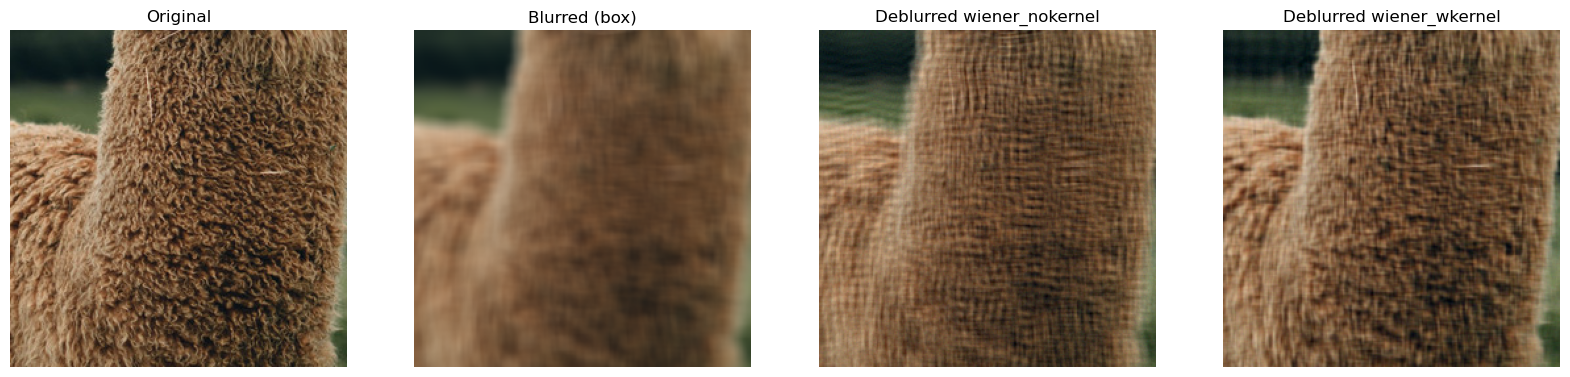

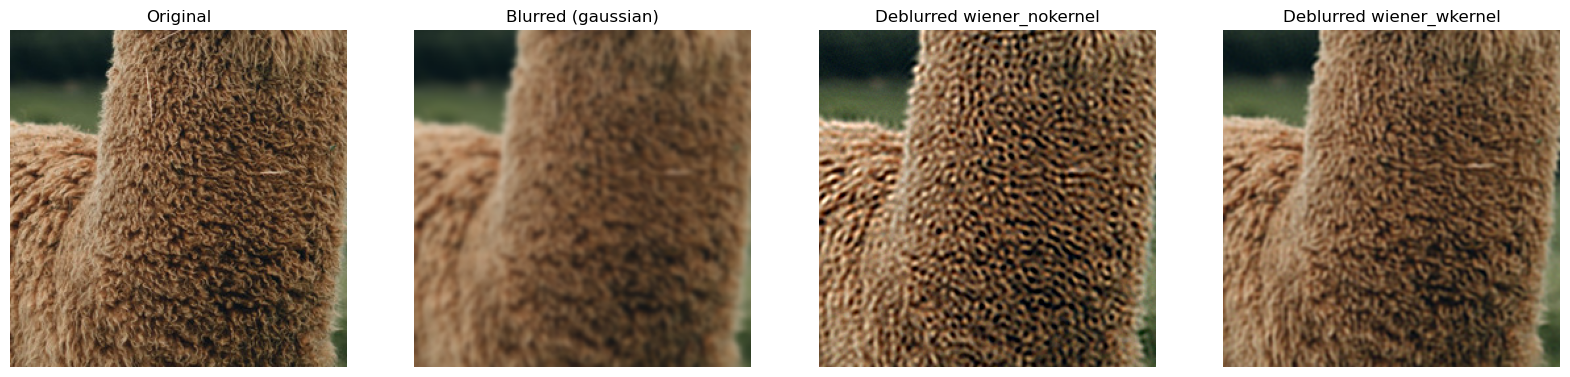

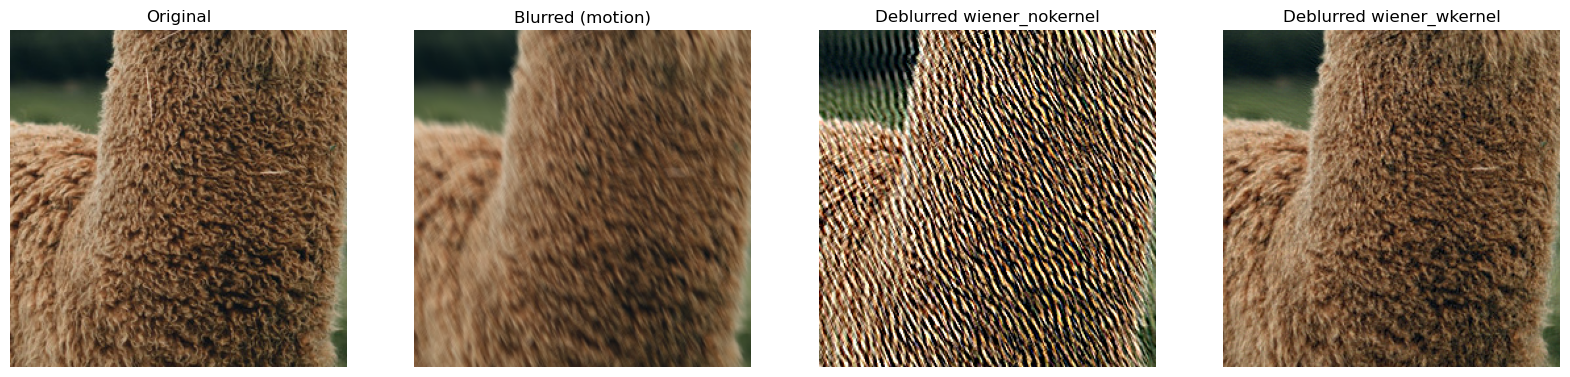

In [ ]:
show_comparison(
    key=single_image_key, 
    method=single_image_method, 
    blur_types=BLUR_TYPES, 
    cropped=True
)

Load and merge metrics datasets with original one


## Preprocess


In [1]:
import pandas as pd
import numpy as np

from common.config import IDPA_DATASET, WIENER_NOKERNEL_DATASET, WIENER_WKERNEL_DATASET, DEBLURGANV2_DATASET, PSEUDOINVERSE_NOKERNEL_DATASET, PSEUDOINVERSE_WKERNEL_DATASET
from common.config import METRIC_TYPES, BLUR_TYPES

original_df = pd.read_parquet(IDPA_DATASET).dropna()

dfs = {
    'pseudoinverse_nokernel': pd.read_parquet(PSEUDOINVERSE_NOKERNEL_DATASET),
    'pseudoinverse_wkernel': pd.read_parquet(PSEUDOINVERSE_WKERNEL_DATASET),
    'wiener_nokernel': pd.read_parquet(WIENER_NOKERNEL_DATASET),
    'wiener_wkernel': pd.read_parquet(WIENER_WKERNEL_DATASET),
    'deblurganv2': pd.read_parquet(DEBLURGANV2_DATASET)
}

print(f"Image parameters: {original_df.shape}")
display(original_df.head(3))

print(f"Metrics for deblurganv2: {dfs["deblurganv2"].shape}")
display(dfs["deblurganv2"].head(3))

# merge original_df to each of the metrics df
for k in dfs.keys():
    dfs[k] = original_df.merge(dfs[k], on='key')

# Compute metric by computing average metric across blur types for each approach
for df in dfs.values():
    for metric in METRIC_TYPES:
        cols = [f'{metric}_{b}' for b in BLUR_TYPES if f'{metric}_{b}' in df.columns]
        df[metric] = df[cols].mean(axis=1)

Image parameters: (950, 16)


url  category        key  \
2  http://411posters.com/wp-content/uploads/2011/...    poster  000000382   
5  http://a.mktgcdn.com/p/0LhPt4Nq5I-vk_mT8U64np5...  withchar  000000931   
6  http://a1.espncdn.com/photo/2012/1113/mag_odog...   complex  000000558   

    width  height exif  aspect_ratio       size  rms_contrast  \
2  1300.0  1728.0   {}      0.752315  3169036.0      0.373365   
5  1680.0  1120.0   {}      1.500000  3369749.0      0.302635   
6  2048.0  1280.0   {}      1.600000  3899907.0      0.220292   

   sobel_edge_strength  canny_edge_density  box_size  gaussian_sigma  \
2            54.414061            0.139681      14.0        2.079159   
5            61.659178            0.114193       5.0        0.966656   
6            60.462335            0.090309      12.0        2.335230   

   gaussian_size  motion_length  motion_angle  
2           13.0           13.0    232.710817  
5            7.0           17.0    112.800705  
6           15.0           16.0    152.963697

Metrics for deblurganv2: (950, 16)


key  proctime_box  proctime_gaussian  proctime_motion  ssim_box  \
0  000000000      0.771006           0.227473         0.227028  0.624878   
1  000000002      0.243786           0.229896         0.233648  0.592647   
2  000000003      0.220997           0.182720         0.180572  0.716148   

    psnr_box  lpips_box  gmsd_box  ssim_gaussian  psnr_gaussian  \
0  21.736350   0.063853  0.269811       0.618547      21.525129   
1  22.730560   0.006872  0.227930       0.655491      23.634710   
2  25.098564   0.004474  0.189143       0.540464      21.949155   

   lpips_gaussian  gmsd_gaussian  ssim_motion  psnr_motion  lpips_motion  \
0        0.089766       0.278274     0.789718    24.130607      0.005149   
1        0.010482       0.216396     0.536058    21.578249      0.040192   
2        0.144286       0.256134     0.667576    23.922039      0.035748   

   gmsd_motion  
0     0.174958  
1     0.224285  
2     0.192016

## Descriptive statistics and Data exploration


We start by presenting describtion of the image features and average deblurring metrics for one method.


In [2]:
print("Image characteristics")
display(original_df.describe())

print("Metrics for the approach (deblurganv2)")
display(dfs["deblurganv2"][[f"{x}_motion" for x in METRIC_TYPES]].describe())

Image characteristics


width       height  aspect_ratio          size  rms_contrast  \
count   950.000000   950.000000    950.000000  9.500000e+02    950.000000   
mean   1556.865263  1361.677895      1.215505  3.510588e+06      0.241307   
std     461.015906   434.723050      0.383402  1.992244e+06      0.054723   
min     170.000000   117.000000      0.463392  7.694000e+03      0.060424   
25%    1223.000000  1080.000000      0.800500  2.274401e+06      0.204291   
50%    1500.000000  1280.000000      1.333333  3.223864e+06      0.239974   
75%    1920.000000  1600.000000      1.500000  4.179430e+06      0.277998   
max    4000.000000  4066.000000      3.200000  1.768750e+07      0.430649   

       sobel_edge_strength  canny_edge_density    box_size  gaussian_sigma  \
count           950.000000          950.000000  950.000000      950.000000   
mean             63.759947            0.128991   10.117895        2.199617   
std              25.274638            0.057644    3.151395        0.995533   
min               8.266673            0.000000    5.000000        0.515940   
25%              45.575302            0.088474    7.000000        1.348071   
50%              61.044392            0.123753   10.000000        2.155779   
75%              78.197440            0.162452   13.000000        3.062990   
max             203.722492            0.373182   15.000000        3.998513   

       gaussian_size  motion_length  motion_angle  
count     950.000000     950.000000    950.000000  
mean       13.461053      17.590526    183.191937  
std         5.549477       7.629577    103.763953  
min         5.000000       5.000000      0.618597  
25%         9.000000      11.000000     91.414728  
50%        13.000000      18.000000    181.171951  
75%        19.000000      24.000000    272.798978  
max        21.000000      30.000000    359.313659

Metrics for the approach (deblurganv2)


proctime_motion  ssim_motion  psnr_motion  lpips_motion  gmsd_motion
count       950.000000   950.000000   950.000000    950.000000   950.000000
mean          0.272145     0.649029    21.910387      0.038359     0.195934
std           0.791852     0.139076     3.229507      0.046682     0.039911
min           0.043471     0.053819     9.067159      0.000395     0.054666
25%           0.176843     0.566727    19.672574      0.008121     0.171531
50%           0.214353     0.669297    21.856127      0.025873     0.198080
75%           0.272549     0.746818    23.917755      0.051549     0.225189
max          23.681326     0.960551    34.828347      0.458100     0.321087

We build pair plot for the metrics for one of the approaches.


In [3]:
top_proctime_df = dfs["deblurganv2"].nlargest(10, "proctime")[["key", "proctime", "size", "width", "height"]]

top_proctime_df

key   proctime        size   width  height
680  000000478  24.208056  17687502.0  4000.0  4000.0
319  000000581   3.676692   7749483.0  2714.0  4066.0
515  000000352   2.718421  14886231.0  3840.0  2160.0
375  000000337   2.566817  16230722.0  3840.0  2160.0
331  000001179   2.377672  12103231.0  3500.0  2113.0
377  000001207   2.284155  15721443.0  2399.0  3036.0
537  000001222   1.613782   6531868.0  2890.0  2410.0
837  000000821   1.375062  12412303.0  3000.0  2254.0
712  000000842   1.344908   8472127.0  3500.0  2100.0
101  000001165   1.098550   9060934.0  3050.0  2308.0

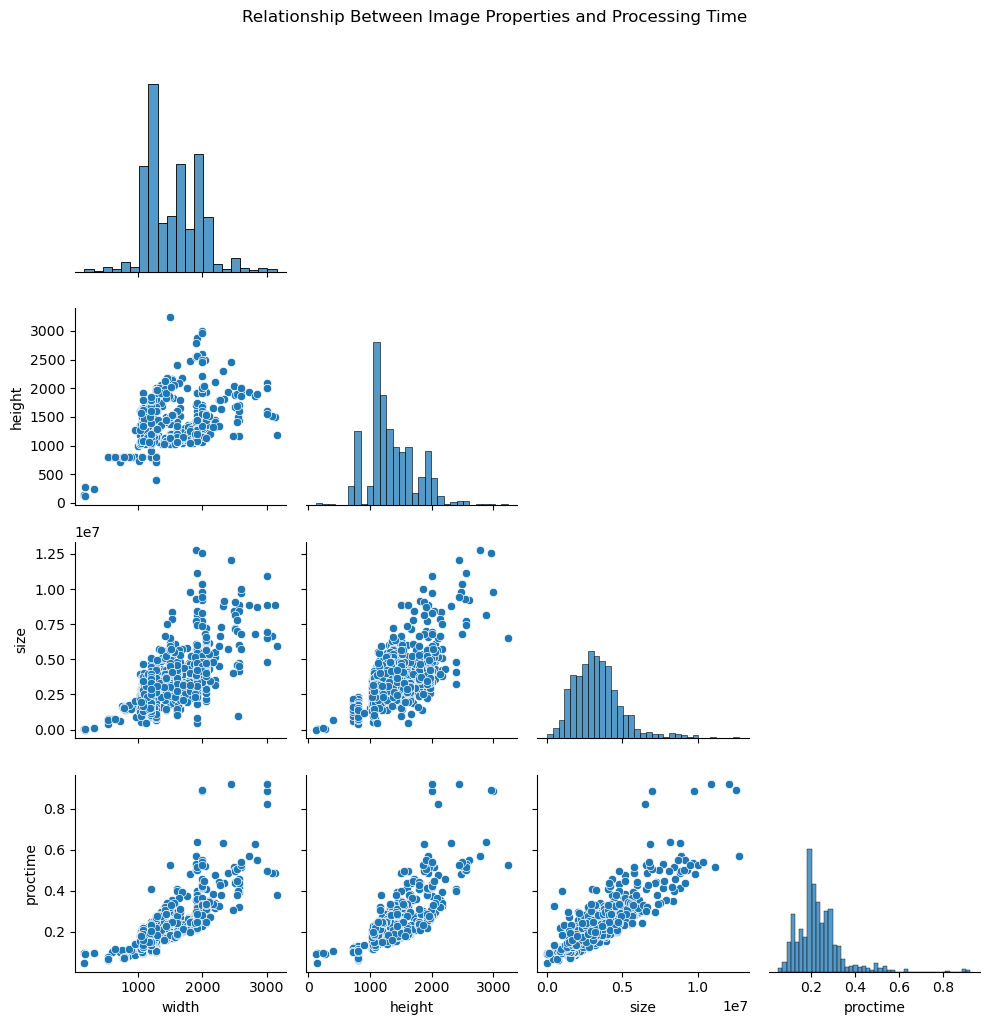

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_cols = ['width', 'height', 'size', 'proctime']

outlier_idxs = top_proctime_df.index

g = sns.pairplot(dfs['deblurganv2'][plot_cols].drop(outlier_idxs), diag_kind='hist', corner=True)
plt.suptitle('Relationship Between Image Properties and Processing Time', y=1.02)
plt.tight_layout()
plt.show()

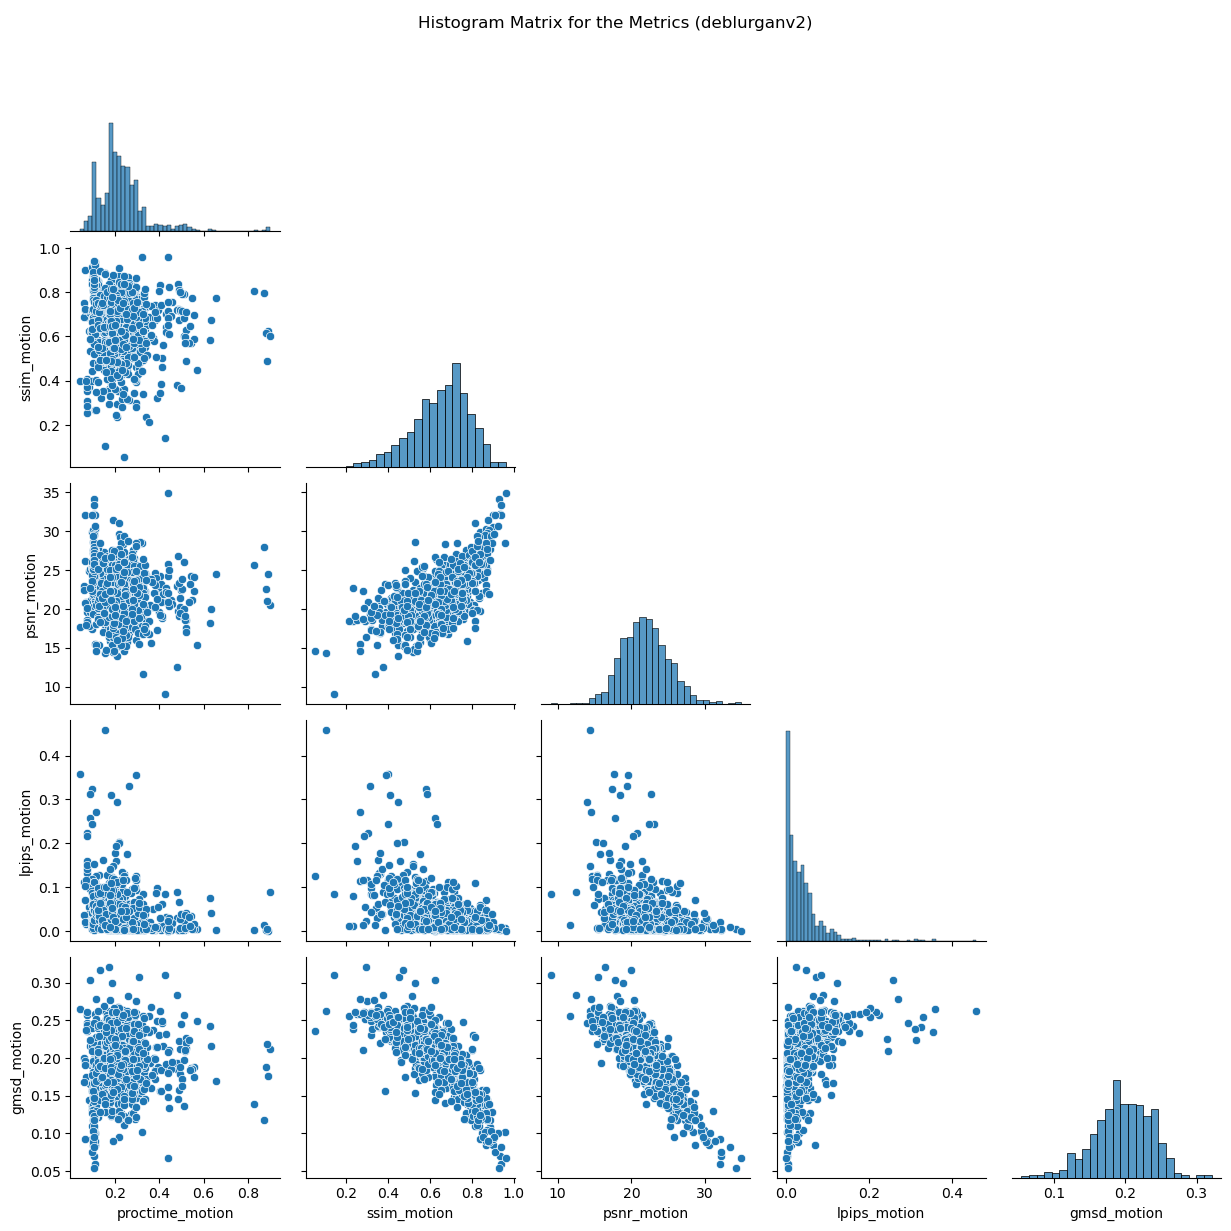

In [5]:
metric_cols = [f'{metric}_motion' for metric in METRIC_TYPES if f'{metric}' in dfs['deblurganv2'].columns]
plot_df_wk = dfs['deblurganv2'][metric_cols].copy().drop(outlier_idxs)

sns.pairplot(plot_df_wk, diag_kind='hist', corner=True)
plt.suptitle('Histogram Matrix for the Metrics (deblurganv2)')
plt.show()

To confirm our assumptions about the correlation of the metrics we compute a correlation heat map for each metric across all methods. The correlation is computed using the Pearson coefficient.

The Pearson correlation coefficient, denoted as $\rho$ for the population and $r$ for the sample, measures the linear relationship between two variables $X$ and $Y$. It is calculated as:

$$
\rho = \frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

where $\mathrm{Cov}(X, Y)$ is the covariance between $X$ and $Y$, and $\sigma_X$, $\sigma_Y$ are the standard deviations of $X$ and $Y$, respectively. The value of $r$ ranges from $-1$ (perfect negative linear correlation) to $+1$ (perfect positive linear correlation), with $0$ indicating no linear correlation.


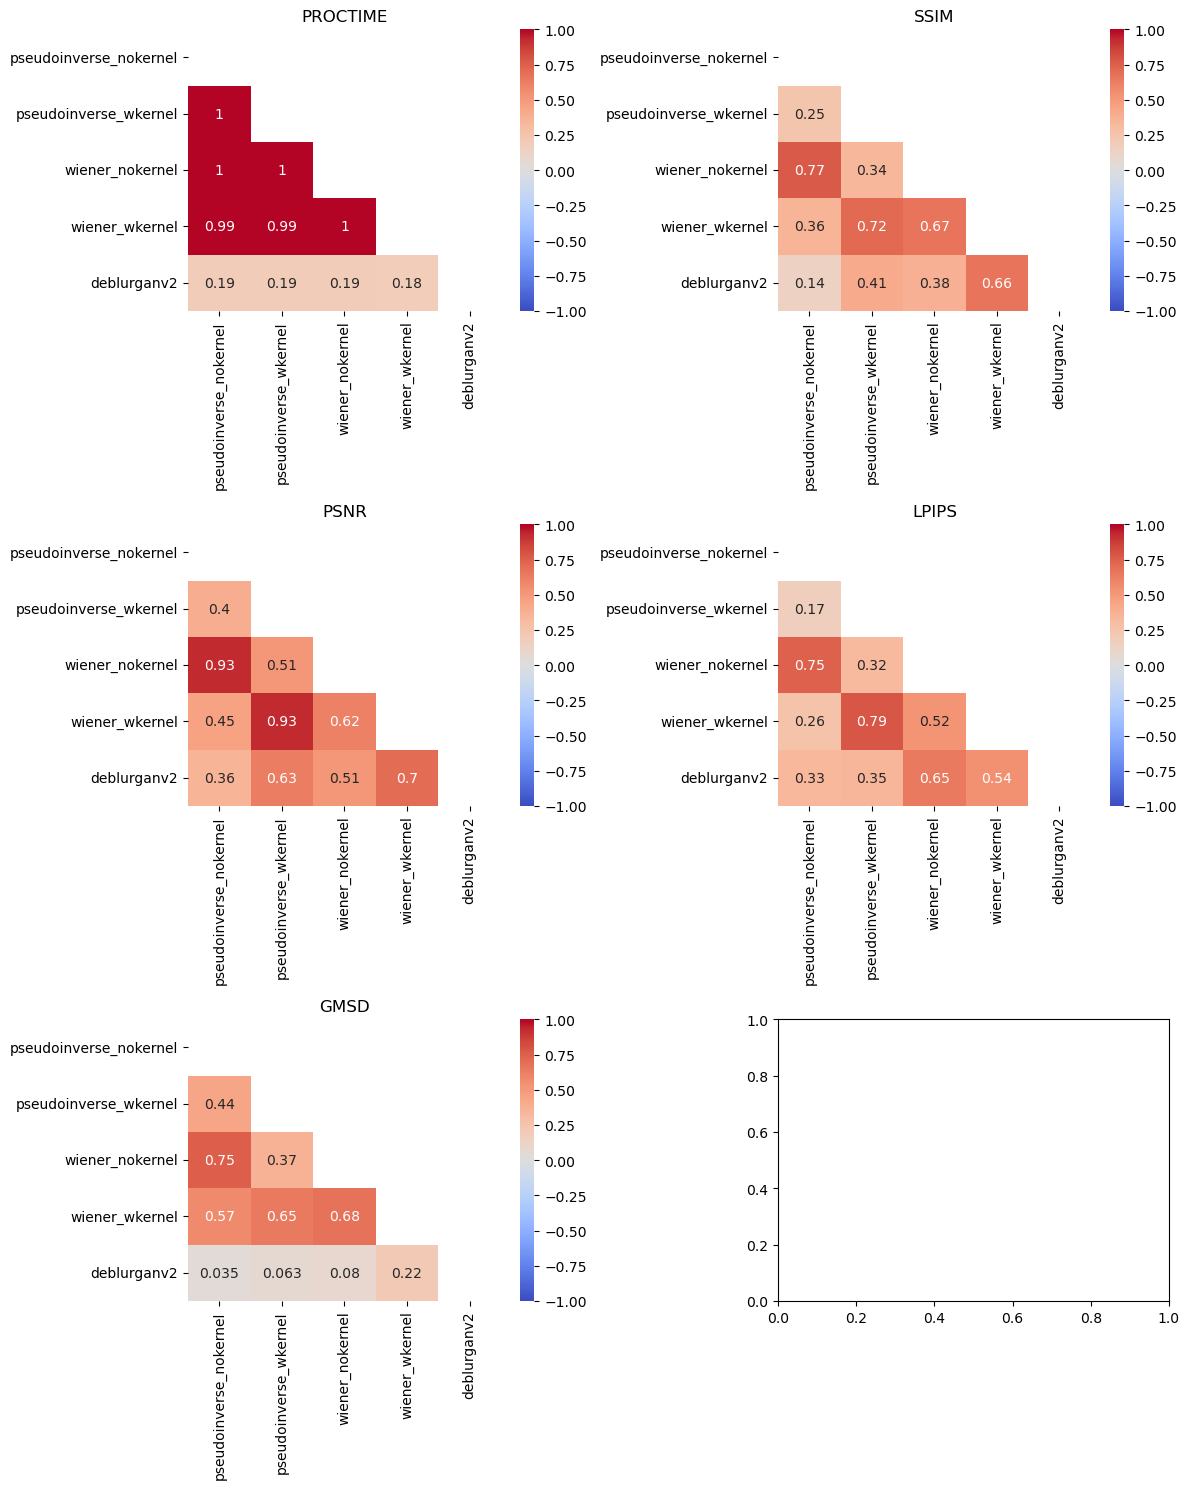

In [10]:
n_metrics = len(METRIC_TYPES)
n_cols = 2
n_rows = (n_metrics + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, metric in enumerate(METRIC_TYPES):
    data = pd.DataFrame({
        method: df[metric] for method, df in dfs.items()
    })
    corr = data.corr()**2
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask, ax=axes[i])
    axes[i].set_title(metric.upper())

plt.tight_layout()
plt.show()

We compute boxplots across methods for each metric to compare the performance of each method considering metrics separately.


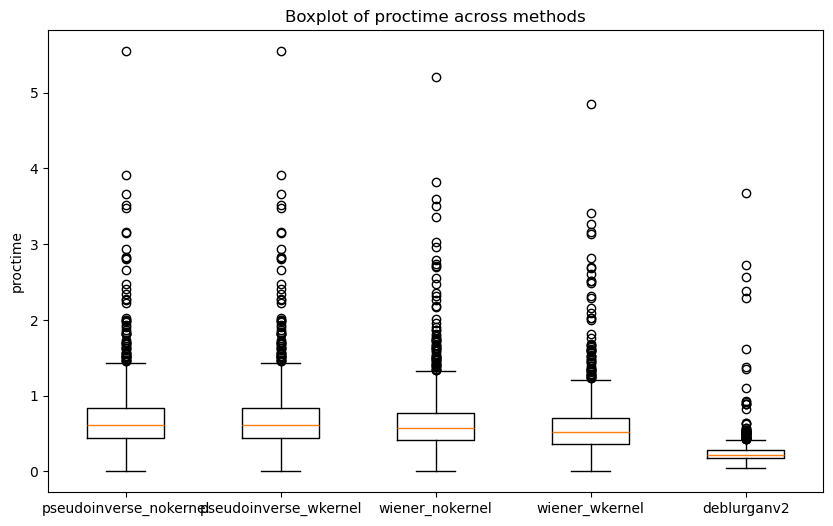

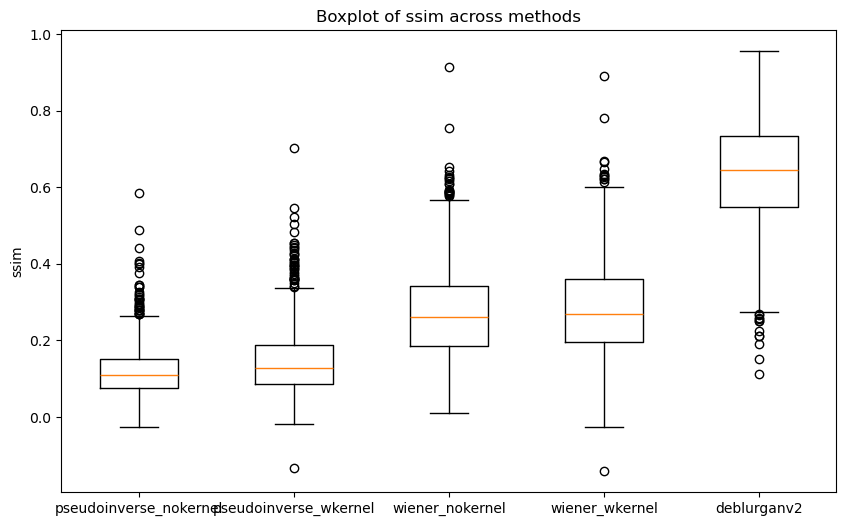

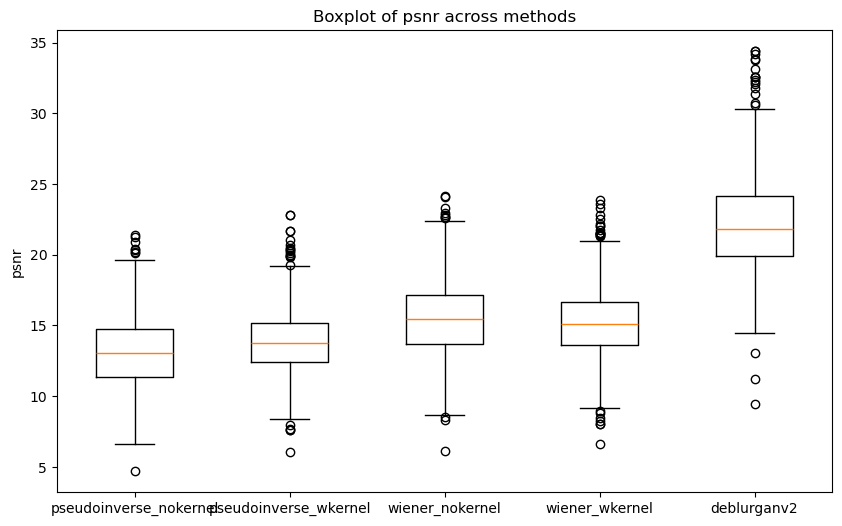

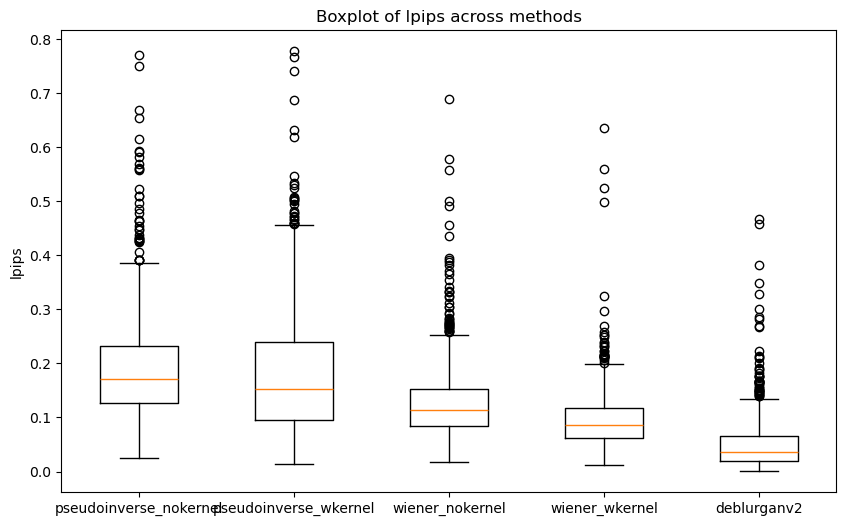

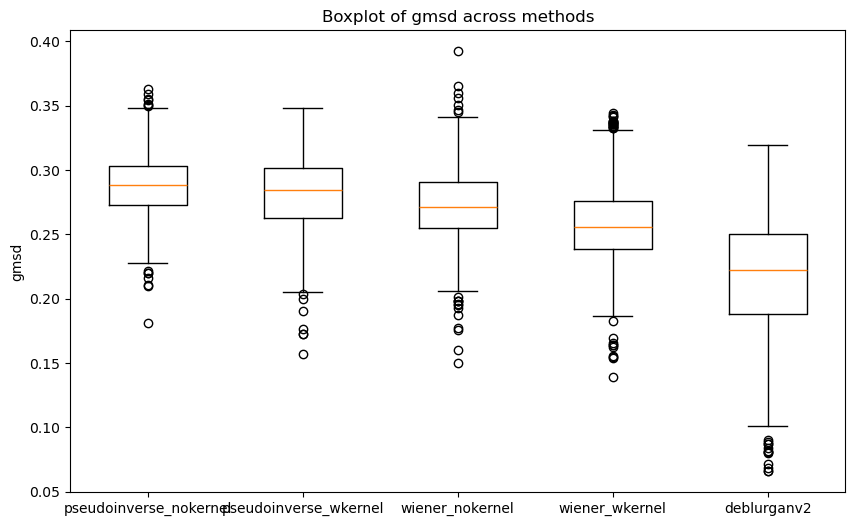

In [8]:
for metric in METRIC_TYPES:
    plt.figure(figsize=(10, 6))
    data = [df[metric] for df in dfs.values()]
    plt.boxplot(data, tick_labels=dfs.keys())
    plt.title(f'Boxplot of {metric} across methods')
    plt.ylabel(metric)
    plt.show()

We confirm the assumptions about performance by comparing the means of each metric.


In [9]:
display(pd.DataFrame({
    method: [df[metric].mean() for metric in METRIC_TYPES]
    for method, df in dfs.items()
}, index=METRIC_TYPES))

pseudoinverse_nokernel  pseudoinverse_wkernel  wiener_nokernel  \
proctime                0.708261               0.708261         0.668106   
ssim                    0.121344               0.146681         0.273878   
psnr                   13.100672              13.852488        15.536871   
lpips                   0.190885               0.179899         0.127103   
gmsd                    0.288286               0.281192         0.272836   

          wiener_wkernel  deblurganv2  
proctime        0.605277     0.249360  
ssim            0.283181     0.634849  
psnr           15.168785    22.099893  
lpips           0.095224     0.050332  
gmsd            0.257926     0.216951

## 3. Hypothesis Testing and Power Analysis

Now we compare the performance of methods using paired tests on average metrics.

### Hypothesis Testing on `lpips_motion`

We performed an independent t-test to evaluate whether the average `lpips_motion` metric differs significantly based on the motion angle.

---

#### Test: High vs Low Motion Angle in Wiener (No Kernel)

Let $\mu_1$ be the mean lpips metric for the motion blur for images with a motion angle greater than 180°  
and $\mu_2$ be the mean lpips metric for the motion blur for images with a motion angle of 180° or lower.

**$H_0$:** $\mu_1 = \mu_2$  
**$H_1$:** $\mu_1 \neq \mu_2$

**t-statistic:** (value from test)  
**p-value:** (value from test)

A non-significant p-value indicates that there is no statistically significant difference between the two groups.

In [18]:
from scipy.stats import ttest_ind

group1 = dfs["wiener_nokernel"][dfs["wiener_nokernel"]["motion_angle"] > 180]["lpips_motion"]
group2 = dfs["wiener_nokernel"][dfs["wiener_nokernel"]["motion_angle"] <= 180]["lpips_motion"]

t1, p1 = ttest_ind(group1, group2)

print(f"T-statistic: {t1}")
print(f"P-value: {p1}")

T-statistic: -1.5880930730350467
P-value: 0.11259909037840973


### Hypothesis Testing 1: Paired t-test (Wiener with kernel vs without kernel) — SSIM

We want to verify whether using the kernel in the Wiener method leads to improved performance compared to the version without kernel, considering the **SSIM** metric.

**Definitions:**
- $X_1$: SSIM for Wiener **with kernel**
- $X_2$: SSIM for Wiener **without kernel**
- $D = X_1 - X_2$: difference in metrics for each image

**Hypotheses:**

- $H_0$: $\mu_D \leq 0$  
    (No average improvement, or Wiener with kernel performs the same or worse than the version without kernel)
- $H_1$: $\mu_D > 0$  
    (Wiener with kernel has a higher mean SSIM than the version without kernel)

**Test used:**  
Paired t-test (one-tailed, left)

In [ ]:
from scipy.stats import ttest_rel, t

metric = "ssim"

ssim_wk = dfs["wiener_wkernel"][metric]
ssim_nk = dfs["wiener_nokernel"][metric]

# 1. Hypotheses
print("1. Hypotheses:")
print(f"   H0: μ_d <= 0 (no difference in {metric} between Wiener with and without kernel)")
print(f"   H1: μ_d > 0 (Wiener with kernel has HIGHER {metric})")

# 2. Acceptance region (one-tailed, right)
alpha = 0.05
n = len(ssim_wk)
df = n - 1
t_critical = t.ppf(1 - alpha, df)
print(f"\n2. Acceptance region:")
print(f"   Reject H0 if t > {t_critical:.4f} (alpha = {alpha})")

# 3. Test statistic
stat, p_value_one_tailed = ttest_rel(ssim_wk, ssim_nk, alternative='greater')
print(f"\n3. Test statistic:")
print(f"   t = {stat:.4f}")

# 4. Decision
print("\n4. Decision:")
if stat > t_critical:
    print(f"   Reject H0: There is evidence Wiener with kernel has HIGHER {metric}.")
else:
    print("   Fail to reject H0: No evidence Wiener with kernel is better.")

# 5. p-value (one-tailed, right tail)
print(f"\n5. p-value (one-tailed, right): {p_value_one_tailed}")


1. Hypotheses:
   H0: μ_d = 0 (no difference in ssim between Wiener with and without kernel)
   H1: μ_d > 0 (Wiener with kernel has HIGHER ssim)

2. Acceptance region:
   Reject H0 if t > 1.6465 (alpha = 0.05)

3. Test statistic:
   t = 3.7767

4. Decision:
   Reject H0: There is evidence Wiener with kernel has HIGHER ssim.

5. p-value (one-tailed, right): 8.440679571281921e-05


### Paired confidence interval

The confidence interval estimate for the mean of paired differences is:

\[
\bar{d} \pm t_{n-1,\,1-\alpha/2} \cdot \frac{s_d}{\sqrt{n}}
\]

where:
- $\bar{d}$ is the mean of the differences,
- $s_d$ is the standard deviation of the differences,
- $n$ is the number of pairs,
- $t_{n-1,\,1-\alpha/2}$ is the quantile of the Student's t-distribution with $n-1$ degrees of freedom.

In [20]:
import numpy as np
from scipy.stats import t

# 99% confidence interval for the mean of the differences D = X1 - X2 (SSIM Wiener with kernel - without kernel)

D = ssim_wk - ssim_nk
D = D.dropna()
n = len(D)
mean_D = D.mean()
std_D = D.std()
se_D = std_D / np.sqrt(n)
confidence_level = 0.99
alpha = 1 - confidence_level
df = n - 1

t_critical = t.ppf(1 - alpha/2, df)
margin_error = t_critical * se_D
ci_lower = mean_D - margin_error
ci_upper = mean_D + margin_error

print(f"99% confidence interval for the mean of the differences (D = SSIM_wk - SSIM_nk):")
print(f"[{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Mean of the differences: {mean_D:.4f}")
print(f"Does the interval contain zero? {'Yes' if ci_lower <= 0 <= ci_upper else 'No'}")

99% confidence interval for the mean of the differences (D = SSIM_wk - SSIM_nk):
[0.0029, 0.0157]
Mean of the differences: 0.0093
Does the interval contain zero? No


### Hypothesis Testing 2: Independent t-test (DeblurGANv2 vs Wiener without kernel) — LPIPS (Motion Blur Only)

We want to verify whether the average perceptual quality (LPIPS) for **motion blur** obtained with DeblurGANv2 is significantly different (lower, thus better) compared to Wiener without kernel.

**Definitions:**
- $X_1$: LPIPS (motion blur) for DeblurGANv2
- $X_2$: LPIPS (motion blur) for Wiener without kernel

**Hypotheses:**

- $H_0$: $\mu_1 \geq \mu_2$  
    (There is no significant difference between DeblurGANv2 and Wiener without kernel for motion blur)
- $H_1$: $\mu_1 < \mu_2$  
    (DeblurGANv2 has a lower, thus better, mean LPIPS than Wiener without kernel for motion blur)

**Test used:**  
Independent two-sample t-test (one-tailed, left)

In [ ]:
from scipy.stats import ttest_ind, t

metric = "lpips_motion"

lpips_dg = dfs["deblurganv2"][metric]
lpips_nk = dfs["wiener_nokernel"][metric]

# 1. Hypotheses
print("1. Hypotheses:")
print(f"   H0: μ1 >= μ2 (no difference in {metric} between DeblurGANv2 and Wiener no kernel)")
print(f"   H1: μ1 < μ2 (DeblurGANv2 has LOWER {metric})")

# 2. Acceptance region (one-tailed, left)
alpha = 0.05
n1, n2 = len(lpips_dg), len(lpips_nk)
s1 = lpips_dg.std()
s2 = lpips_nk.std()
df = (s1**2/n1 + s2**2/n2)**2 / ((s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1))
t_critical = t.ppf(alpha, df)
print(f"\n2. Acceptance region:")
print(f"   Reject H0 if t < {t_critical:.4f} (alpha = {alpha})")

# 3. Test statistic
stat, p_value_one_tailed = ttest_ind(lpips_dg, lpips_nk, equal_var=False, alternative='less')
print(f"\n3. Test statistic:")
print(f"   t = {stat:.4f}")

# 4. Decision
print("\n4. Decision:")
if stat < t_critical:
    print(f"   Reject H0: There is evidence DeblurGANv2 has LOWER {metric}.")
else:
    print("   Fail to reject H0: No evidence DeblurGANv2 is better.")

# 5. p-value (one-tailed, left tail)
print(f"\n5. p-value (one-tailed, left): {p_value_one_tailed:}")

1. Hypotheses:
   H0: μ1 = μ2 (no difference in lpips_motion between DeblurGANv2 and Wiener no kernel)
   H1: μ1 < μ2 (DeblurGANv2 has LOWER lpips_motion)

2. Acceptance region:
   Reject H0 if t < -1.6460 (alpha = 0.05)

3. Test statistic:
   t = -39.2796

4. Decision:
   Reject H0: There is evidence DeblurGANv2 has LOWER lpips_motion.

5. p-value (one-tailed, left): 4.269237045438823e-225


In [22]:
from scipy.stats import norm
import numpy as np

# Parameters for the test
# lpips_dg and lpips_nk are already defined as the two data series
n1 = len(lpips_dg)
n2 = len(lpips_nk)
alpha = 0.05  # significance level

# Minimum relevant difference (delta): you can choose a value, e.g., the observed difference
delta = lpips_dg.mean() - lpips_nk.mean()

# Pooled standard deviation
s1 = lpips_dg.std()
s2 = lpips_nk.std()
s_pooled = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / (n1 + n2 - 2))

# Standard error of the difference
se = s_pooled * np.sqrt(1/n1 + 1/n2)

# Critical threshold for left-tailed test
z_alpha = norm.ppf(alpha)

# Mean of the statistic under the alternative
mu_Z1 = delta / se

# Power calculation
power = norm.cdf(z_alpha, loc=mu_Z1, scale=1)

print(f"Test power (z-test approximation): {power}")

Test power (z-test approximation): 1.0


In [23]:
import numpy as np
from scipy.stats import t

X1 = lpips_dg.dropna()
X2 = lpips_nk.dropna()
n1, n2 = len(X1), len(X2)
mean1, mean2 = X1.mean(), X2.mean()
std1, std2 = X1.std(ddof=1), X2.std(ddof=1)

# Estimate of the standard error (Welch's t-test, unequal variances)
se_diff = np.sqrt(std1**2/n1 + std2**2/n2)
mean_diff = mean1 - mean2

# Degrees of freedom (Welch-Satterthwaite equation)
df_diff = (std1**2/n1 + std2**2/n2)**2 / ((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))

# 99% confidence interval
confidence_level = 0.99
alpha = 1 - confidence_level
t_critical_diff = t.ppf(1 - alpha/2, df_diff)
margin_error_diff = t_critical_diff * se_diff
ci_lower_diff = mean_diff - margin_error_diff
ci_upper_diff = mean_diff + margin_error_diff

print(f"99% CI for mean difference (DeblurGANv2 - Wiener no kernel) on LPIPS_motion:")
print(f"[{ci_lower_diff:.4f}, {ci_upper_diff:.4f}]")
print(f"Mean difference: {mean_diff:.4f}")
print(f"Does the interval contain zero? {'Yes' if ci_lower_diff <= 0 <= ci_upper_diff else 'No'}")

99% CI for mean difference (DeblurGANv2 - Wiener no kernel) on LPIPS_motion:
[-0.1517, -0.1330]
Mean difference: -0.1424
Does the interval contain zero? No


### Hypothesis Testing 3: Difference in Proportions — Threshold Exceedance

We want to verify whether **DeblurGANv2** exceeds a quality threshold (e.g., GMSD < 0.20) **more often** than Wiener **without kernel**, considering only the **motion blur** case.

**Definitions:**
- $p_1$: Proportion of images with GMSD\_motion < 0.20 for DeblurGANv2
- $p_2$: Proportion of images with GMSD\_motion < 0.20 for Wiener without kernel

**Hypotheses:**

- $H_0$: $p_1 \leq p_2$  
    (The proportions of success are equal)
- $H_1$: $p_1 > p_2$  
    (DeblurGANv2 has a higher proportion of successes)

**Test used:**  
z-test for proportions (one-tailed, right, on GMSD\_motion)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

metric = "gmsd_motion"
threshold = 0.20

# 1. Hypotheses:
print("1. Hypotheses:")
print(f"   H0: p1 <= p2 (DeblurGANv2 and Wiener no kernel have the same proportion of images with {metric} < {threshold})")
print(f"   H1: p1 > p2 (DeblurGANv2 has a higher proportion of images with {metric} < {threshold})")

# Calculate proportions GMSD < threshold
success_ai = (dfs['deblurganv2'][metric] < threshold).sum()
n_ai = dfs['deblurganv2'][metric].notna().sum()
success_nk = (dfs['wiener_nokernel'][metric] < threshold).sum()
n_nk = dfs['wiener_nokernel'][metric].notna().sum()

count = [success_ai, success_nk]
nobs = [n_ai, n_nk]

# 2. Acceptance region (one-tailed, right, alpha=0.05)
alpha = 0.05
z_critical = norm.ppf(1 - alpha)
print(f"\n2. Acceptance region:")
print(f"   Reject H0 if z > {z_critical:.4f} (alpha = {alpha})")

# 3. Test statistic (one-tailed, alternative='larger')
stat, p_value = proportions_ztest(count, nobs, alternative='larger')
print(f"\n3. Test statistic:")
print(f"   z = {stat:.4f}")

# 4. Decision
print("\n4. Decision:")
if stat > z_critical:
    print("   Reject H0: DeblurGANv2 has a significantly higher proportion of successes.")
else:
    print("   Fail to reject H0: No significant difference in proportions.")

# 5. p-value (one-tailed)
print(f"\n5. p-value (one-tailed): {p_value:.4e}")

print(f"\nDeblurGANv2: {success_ai}/{n_ai} ({success_ai/n_ai:.2%})")
print(f"Wiener no kernel: {success_nk}/{n_nk} ({success_nk/n_nk:.2%})")


1. Hypotheses:
   H0: p1 = p2 (DeblurGANv2 and Wiener no kernel have the same proportion of images with gmsd_motion < 0.2)
   H1: p1 > p2 (DeblurGANv2 has a higher proportion of images with gmsd_motion < 0.2)

2. Acceptance region:
   Reject H0 if z > 1.6449 (alpha = 0.05)

3. Test statistic:
   z = 25.2329

4. Decision:
   Reject H0: DeblurGANv2 has a significantly higher proportion of successes.

5. p-value (one-tailed): 8.7268e-141

DeblurGANv2: 498/949 (52.48%)
Wiener no kernel: 11/949 (1.16%)


In [25]:
from statsmodels.stats.proportion import confint_proportions_2indep

# 99% confidence interval for the difference in proportions (p1 - p2)
alpha_ci = 0.01  # 99% CI
ci_low, ci_upp = confint_proportions_2indep(
    count1=success_ai, nobs1=n_ai,
    count2=success_nk, nobs2=n_nk,
    method='wald', alpha=alpha_ci
)

print(f"99% confidence interval for the difference in proportions (DeblurGANv2 - Wiener no kernel):")
print(f"[{ci_low:.4f}, {ci_upp:.4f}]")
print(f"Observed difference: {(success_ai/n_ai - success_nk/n_nk):.4f}")

99% confidence interval for the difference in proportions (DeblurGANv2 - Wiener no kernel):
[0.4705, 0.5559]
Observed difference: 0.5132


## 4. Confidence Intervals

We compute 99% confidence intervals to control the consistency with hypothesis tests.


## 5. Linear Regression Analysis

We model the relationship between image features/blur parameters and average deblurring metrics. Visualize regression fit and residuals.


In [ ]:
# import statsmodels.api as sm

# # Example: Predict SSIM_avg for DeblurGANv2
# target = 'ssim'
# X = dfs['deblurganv2'][feature_cols]
# X = sm.add_constant(X)
# y = dfs['deblurganv2'][target]
# model = sm.OLS(y, X, missing='drop').fit()
# print(model.summary())

# # Visualization: predicted vs actual, residuals
# y_pred = model.predict(X)
# plt.figure(figsize=(6,4))
# plt.scatter(y_pred, y, alpha=0.5)
# plt.xlabel('Predicted SSIM')
# plt.ylabel('Actual SSIM')
# plt.title('Regression: Predicted vs Actual (DeblurGANv2)')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
# plt.show()

# residuals = y - y_pred
# plt.figure(figsize=(6,4))
# plt.scatter(y_pred, residuals, alpha=0.5)
# plt.axhline(0, color='gray', linestyle='--')
# plt.xlabel('Predicted SSIM')
# plt.ylabel('Residuals')
# plt.title('Regression Residuals (DeblurGANv2)')
# plt.show()

## 6. Conclusions


# Prove

In [80]:
import statsmodels.api as sm

predictor = 'canny_edge_density'
target = 'ssim_motion'

X = dfs['deblurganv2'][[predictor]].dropna()
y = dfs['deblurganv2'].loc[X.index, target]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ssim_motion   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     393.3
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.81e-73
Time:                        14:07:31   Log-Likelihood:                 691.48
No. Observations:                 949   AIC:                            -1379.
Df Residuals:                     947   BIC:                            -1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8172      0

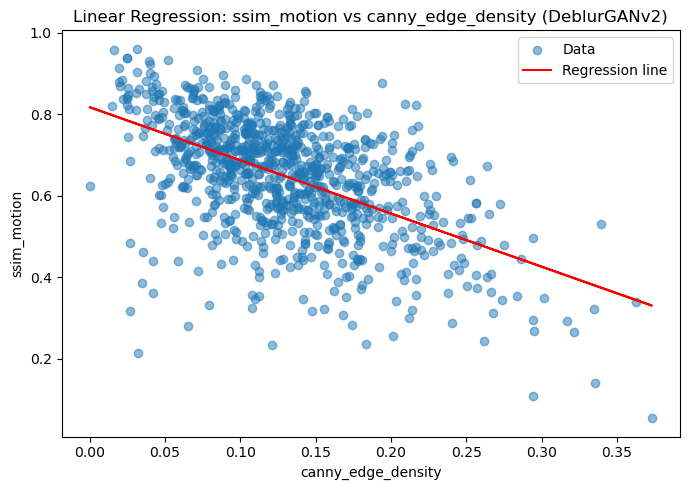

In [81]:
import matplotlib.pyplot as plt
import numpy as np

X_with_const = sm.add_constant(X)
y_pred = model.predict(X_with_const)

plt.figure(figsize=(7, 5))
plt.scatter(X[predictor], y, alpha=0.5, label='Data')
plt.plot(X[predictor], y_pred, color='red', label='Regression line')
plt.xlabel(predictor)
plt.ylabel(target)
plt.title(f'Linear Regression: {target} vs {predictor} (DeblurGANv2)')
plt.legend()
plt.tight_layout()
plt.show()

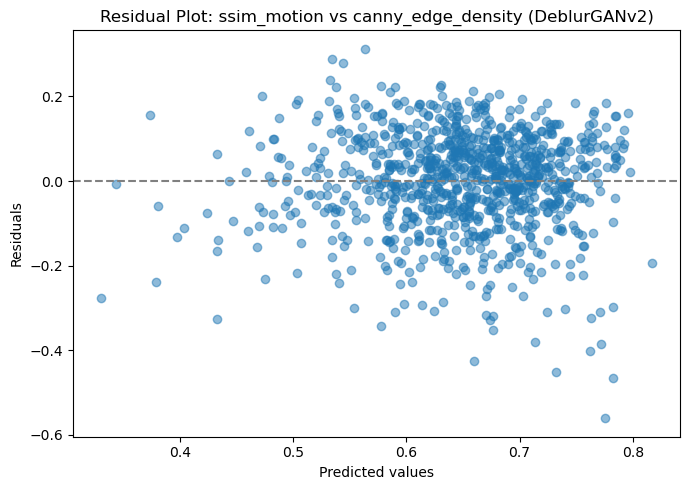

In [82]:
# Calcola i residui
residuals = y - y_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title(f'Residual Plot: {target} vs {predictor} (DeblurGANv2)')
plt.tight_layout()
plt.show()

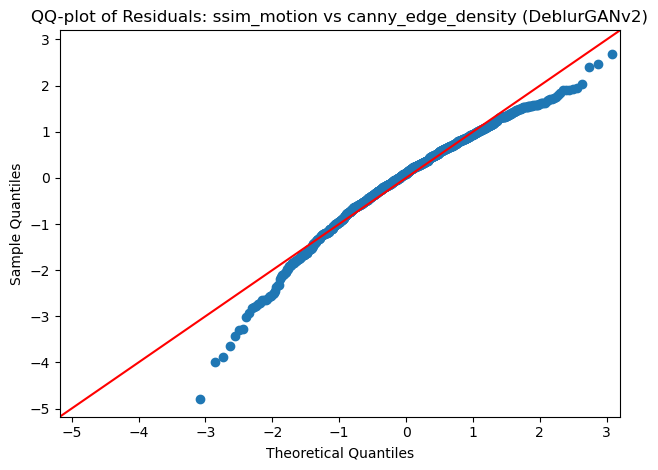

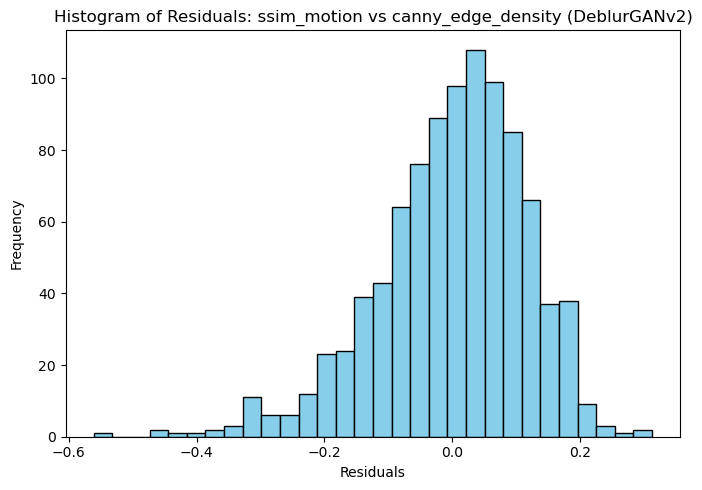

In [55]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='45', fit=True)
plt.title(f'QQ-plot of Residuals: {target} vs {predictor} (DeblurGANv2)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Histogram of Residuals: {target} vs {predictor} (DeblurGANv2)')
plt.tight_layout()
plt.show()

In [58]:
target = 'ssim_motion'
features = ['size', 'rms_contrast', 'sobel_edge_strength', 'canny_edge_density']

X = dfs['deblurganv2'][features].dropna()
y = dfs['deblurganv2'].loc[X.index, target]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ssim_motion   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     154.8
Date:                Thu, 29 May 2025   Prob (F-statistic):          8.04e-102
Time:                        12:14:34   Log-Likelihood:                 765.95
No. Observations:                 949   AIC:                            -1522.
Df Residuals:                     944   BIC:                            -1498.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8142    

In [28]:
import statsmodels.api as sm
import pandas as pd

target = 'ssim_motion'

X_cat = pd.get_dummies(dfs['deblurganv2']['category'], drop_first=True).astype(float)
y = dfs['deblurganv2'][target]

df_reg = pd.concat([X_cat, y], axis=1).dropna()
X = sm.add_constant(df_reg.drop(target, axis=1))
y = df_reg[target]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ssim_motion   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     6.824
Date:                Thu, 29 May 2025   Prob (F-statistic):           6.62e-12
Time:                        11:22:31   Log-Likelihood:                 566.47
No. Observations:                 949   AIC:                            -1107.
Df Residuals:                     936   BIC:                            -1044.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6638      0.014     47.983   

In [59]:
import statsmodels.api as sm
import pandas as pd

features = ['rms_contrast', 'size', 'sobel_edge_strength', 'canny_edge_density']
X_num = dfs['deblurganv2'][features]
X_cat = pd.get_dummies(dfs['deblurganv2']['category'], drop_first=True).astype(float)

X_full = pd.concat([X_num, X_cat], axis=1)
y_full = dfs['deblurganv2']['ssim_motion']
df_reg = pd.concat([X_full, y_full], axis=1).dropna()

X = sm.add_constant(df_reg.drop('ssim_motion', axis=1))
y = df_reg['ssim_motion']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ssim_motion   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     41.11
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.81e-96
Time:                        12:18:47   Log-Likelihood:                 780.06
No. Observations:                 949   AIC:                            -1526.
Df Residuals:                     932   BIC:                            -1444.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8213    

In [60]:
def backward_elimination(X, y):
    variables = list(X.columns)
    best_adj_r2 = -float('inf')
    best_model = None
    best_vars = variables.copy()
    history = []

    while True:
        X_with_const = sm.add_constant(X[variables])
        model = sm.OLS(y, X_with_const).fit()
        adj_r2 = model.rsquared_adj
        history.append((variables.copy(), adj_r2))
        improved = False
        adj_r2s = []
        models = []
        # Try removing each variable
        for var in variables:
            vars_try = [v for v in variables if v != var]
            X_try = sm.add_constant(X[vars_try])
            model_try = sm.OLS(y, X_try).fit()
            adj_r2s.append((var, model_try.rsquared_adj, model_try))
            models.append(model_try)
        # Find the model with the highest adj R2 after removing one variable
        if adj_r2s:
            var_to_remove, best_adj_r2_try, best_model_try = max(adj_r2s, key=lambda x: x[1])
            if best_adj_r2_try > adj_r2:
                variables.remove(var_to_remove)
                best_adj_r2 = best_adj_r2_try
                best_model = best_model_try
                improved = True
            else:
                # No improvement, stop
                best_model = model
                best_adj_r2 = adj_r2
                break
        else:
            break
    print("Backward elimination history (variables, adjusted R2):")
    for vars_used, adjr2 in history:
        print(vars_used, f"Adj R2: {adjr2:.4f}")
    return best_model

final_model = backward_elimination(X, y)
print(final_model.summary())

Backward elimination history (variables, adjusted R2):
['const', 'rms_contrast', 'size', 'sobel_edge_strength', 'canny_edge_density', 'architecture', 'comic', 'complex', 'food', 'furniture', 'indoor_scene', 'map', 'people', 'poster', 'scenery', 'vehicle', 'withchar'] Adj R2: 0.4037
['const', 'rms_contrast', 'size', 'sobel_edge_strength', 'canny_edge_density', 'architecture', 'comic', 'complex', 'food', 'furniture', 'indoor_scene', 'map', 'people', 'scenery', 'vehicle', 'withchar'] Adj R2: 0.4043
['const', 'rms_contrast', 'size', 'sobel_edge_strength', 'canny_edge_density', 'architecture', 'comic', 'complex', 'food', 'furniture', 'indoor_scene', 'map', 'scenery', 'vehicle', 'withchar'] Adj R2: 0.4049
['const', 'rms_contrast', 'size', 'sobel_edge_strength', 'canny_edge_density', 'architecture', 'comic', 'complex', 'food', 'furniture', 'map', 'scenery', 'vehicle', 'withchar'] Adj R2: 0.4055
['const', 'rms_contrast', 'size', 'sobel_edge_strength', 'canny_edge_density', 'comic', 'complex', 

In [62]:
import statsmodels.api as sm
import pandas as pd

features = ['rms_contrast', 'size', 'sobel_edge_strength', 'canny_edge_density']
X_num = dfs['deblurganv2'][features]
X_cat = pd.get_dummies(dfs['deblurganv2']['category'], drop_first=True).astype(float)

X_full = pd.concat([X_num, X_cat], axis=1)
y_full = dfs['deblurganv2']['ssim_motion']
df_reg = pd.concat([X_full, y_full], axis=1).dropna()

X = df_reg.drop('ssim_motion', axis=1)
y = df_reg['ssim_motion']

def forward_selection(X, y):
    remaining = list(X.columns)
    selected = []
    current_adj_r2 = -float('inf')
    history = []

    while remaining:
        adj_r2_candidates = []
        models = []
        for candidate in remaining:
            vars_try = selected + [candidate]
            X_try = sm.add_constant(X[vars_try])
            model_try = sm.OLS(y, X_try).fit()
            adj_r2_candidates.append((candidate, model_try.rsquared_adj, model_try))
            models.append(model_try)
        # Scegli la variabile che dà il miglior adj R2
        best_candidate, best_adj_r2, best_model = max(adj_r2_candidates, key=lambda x: x[1])
        history.append((selected + [best_candidate], best_adj_r2))
        if best_adj_r2 > current_adj_r2:
            selected.append(best_candidate)
            remaining.remove(best_candidate)
            current_adj_r2 = best_adj_r2
            final_model = best_model
        else:
            break
    print("Forward selection history (variables, adjusted R2):")
    for vars_used, adjr2 in history:
        print(vars_used, f"Adj R2: {adjr2:.4f}")
    return final_model

final_model = forward_selection(X, y)
print(final_model.summary())

Forward selection history (variables, adjusted R2):
['canny_edge_density'] Adj R2: 0.2927
['canny_edge_density', 'sobel_edge_strength'] Adj R2: 0.3539
['canny_edge_density', 'sobel_edge_strength', 'size'] Adj R2: 0.3780
['canny_edge_density', 'sobel_edge_strength', 'size', 'comic'] Adj R2: 0.3935
['canny_edge_density', 'sobel_edge_strength', 'size', 'comic', 'rms_contrast'] Adj R2: 0.4022
['canny_edge_density', 'sobel_edge_strength', 'size', 'comic', 'rms_contrast', 'map'] Adj R2: 0.4061
['canny_edge_density', 'sobel_edge_strength', 'size', 'comic', 'rms_contrast', 'map', 'withchar'] Adj R2: 0.4068
['canny_edge_density', 'sobel_edge_strength', 'size', 'comic', 'rms_contrast', 'map', 'withchar', 'vehicle'] Adj R2: 0.4071
['canny_edge_density', 'sobel_edge_strength', 'size', 'comic', 'rms_contrast', 'map', 'withchar', 'vehicle', 'food'] Adj R2: 0.4073
['canny_edge_density', 'sobel_edge_strength', 'size', 'comic', 'rms_contrast', 'map', 'withchar', 'vehicle', 'food', 'scenery'] Adj R2: 0.

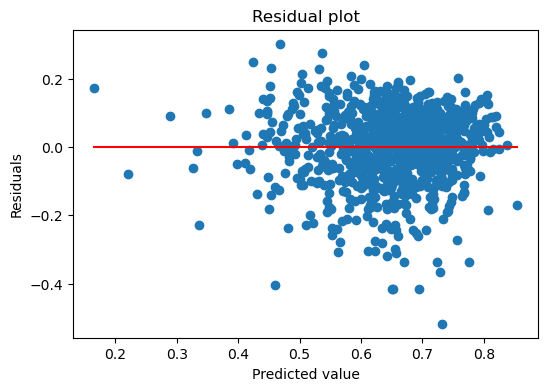

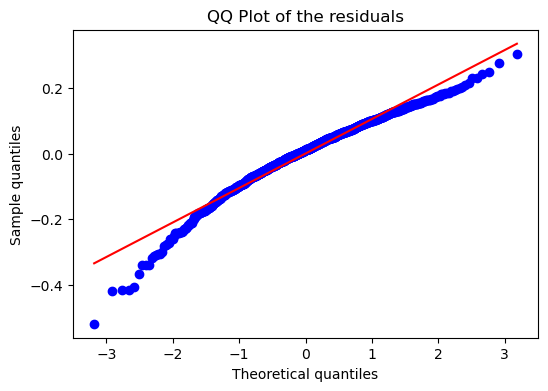

In [70]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Usa solo le colonne selezionate dal modello finale
selected_cols = final_model.model.exog_names
if 'const' in selected_cols:
    selected_cols = [c for c in selected_cols if c != 'const']

X_pred = X[selected_cols]
X_pred = sm.add_constant(X_pred, has_constant='add')
predictions = final_model.predict(X_pred)
residuals = y - predictions

# Residual plot
plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0, 0], color='red')
plt.title('Residual plot')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.show()

# QQ plot dei residui
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of the residuals')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.show()

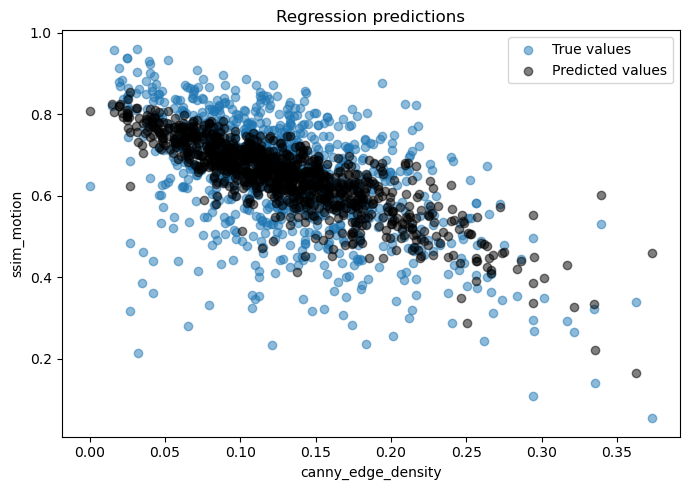

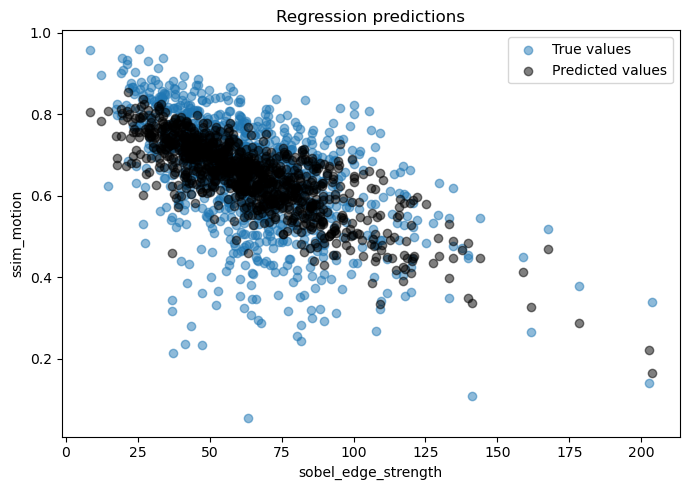

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(X['canny_edge_density'], y, alpha=0.5, label='True values')
plt.scatter(X['canny_edge_density'], predictions, c='black', alpha=0.5, label='Predicted values')
plt.title('Regression predictions')
plt.xlabel('canny_edge_density')
plt.ylabel('ssim_motion')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(X['sobel_edge_strength'], y, alpha=0.5, label='True values')
plt.scatter(X['sobel_edge_strength'], predictions, c='black', alpha=0.5, label='Predicted values')
plt.title('Regression predictions')
plt.xlabel('sobel_edge_strength')
plt.ylabel('ssim_motion')
plt.legend()
plt.tight_layout()
plt.show()

In [76]:
import numpy as np

# Ottieni i nomi delle colonne usate dal modello finale (escludendo la costante)
selected_cols = final_model.model.exog_names
if 'const' in selected_cols:
    selected_cols = [c for c in selected_cols if c != 'const']

# Prepara il nuovo campione con le colonne corrette e aggiungi la costante
X_new = X[selected_cols].iloc[[0]]
X_new = sm.add_constant(X_new, has_constant='add')
y_true = y.iloc[0]

# Calcola la previsione e l'intervallo di predizione al 95%
pred = final_model.get_prediction(X_new)
pred_summary = pred.summary_frame(alpha=0.05)

print("True value:", y_true)
print("Predicted value:", pred_summary['mean'].values[0])
print("95% prediction interval: [{:.4f}, {:.4f}]".format(
    pred_summary['obs_ci_lower'].values[0], pred_summary['obs_ci_upper'].values[0]
))

True value: 0.65472809646547
Predicted value: 0.706272708294511
95% prediction interval: [0.4947, 0.9179]


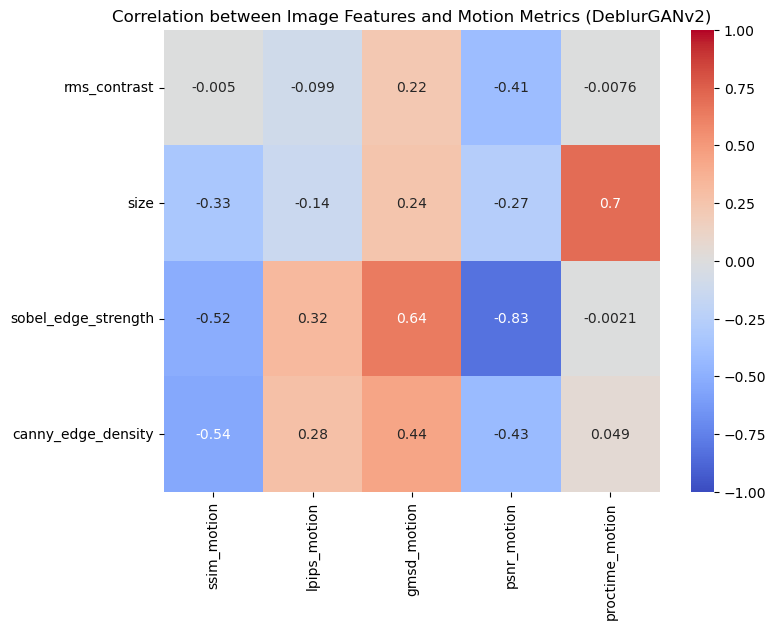

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione tra le feature principali e le metriche motion di DeblurGANv2
features = ['rms_contrast', 'size', 'sobel_edge_strength', 'canny_edge_density']
metrics = ['ssim_motion', 'lpips_motion', 'gmsd_motion', 'psnr_motion', 'proctime_motion']

corr_df = dfs['deblurganv2'][features + metrics].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.loc[features, metrics], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Image Features and Motion Metrics (DeblurGANv2)')
plt.show()

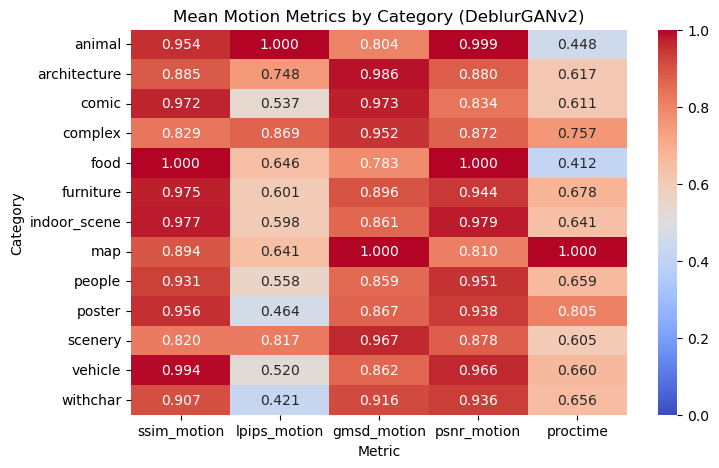

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la media delle metriche motion per ciascuna categoria
metrics = ['ssim_motion', 'lpips_motion', 'gmsd_motion', 'psnr_motion', 'proctime']
category_means = dfs['deblurganv2'].groupby('category')[metrics].mean()

plt.figure(figsize=(8, 5))
sns.heatmap(category_means/category_means.abs().max(), annot=True, cmap="coolwarm", fmt=".3f", vmin=0, vmax=1)
plt.title('Mean Motion Metrics by Category (DeblurGANv2)')
plt.ylabel('Category')
plt.xlabel('Metric')
plt.show()

In [32]:
original_df[original_df["category"] == "animal"].sort_values("key")

url category        key  \
981  https://prosperwell.com/wp-content/uploads/201...   animal  000000800   
882  https://jennifertarheelreader.files.wordpress....   animal  000000801   
80   http://lanting.com/wp-content/uploads/Lanting_...   animal  000000802   
494  https://drscdn.500px.org/photo/41458556/m%3D20...   animal  000000803   
839  https://images7.alphacoders.com/755/thumb-1920...   animal  000000804   
..                                                 ...      ...        ...   
558   https://i.postimg.cc/63B3K1TQ/squirrel-10943.jpg   animal  000000895   
644     https://i.postimg.cc/rsPFSVjd/Swan-takeoff.jpg   animal  000000896   
597      https://i.postimg.cc/NfK0QXGR/tiger-10062.jpg   animal  000000897   
626  https://i.postimg.cc/jdBS2jCm/Underwater-world...   animal  000000898   
574  https://i.postimg.cc/CxDLqVq1/Zebra-fish-pictu...   animal  000000899   

      width  height                                               exif  \
981  1300.0  1600.0  {"Image Make": "Canon", "Image Model": "Canon ...   
882  1200.0  1200.0                                                 {}   
80   1600.0  1067.0               {"Image Copyright": "FRANS LANTING"}   
494  2048.0  1365.0  {"Image ImageDescription": "SONY DSC", "Image ...   
839  1920.0  1440.0                                                 {}   
..      ...     ...                                                ...   
558   850.0   800.0  {"Image Orientation": "Horizontal (normal)", "...   
644  1280.0   720.0  {"Image Orientation": "Horizontal (normal)", "...   
597   800.0   800.0  {"Image Orientation": "Horizontal (normal)", "...   
626  1280.0   800.0  {"Image Orientation": "Horizontal (normal)", "...   
574  1280.0   800.0  {"Image Orientation": "Horizontal (normal)", "...   

     aspect_ratio       size  rms_contrast  sobel_edge_strength  \
981      0.812500  4089906.0      0.191544            67.712599   
882      1.000000  2718220.0      0.287070            72.899636   
80       1.499531  3529230.0      0.194798            64.642614   
494      1.500366  5230409.0      0.219393            43.782052   
839      1.333333  2863457.0      0.161980            25.839854   
..            ...        ...           ...                  ...   
558      1.062500  1436411.0      0.169432            41.681533   
644      1.777778  1243681.0      0.148292            34.383206   
597      1.000000  1584933.0      0.211253            97.413438   
626      1.600000  2140746.0      0.220785            79.596862   
574      1.600000  1608504.0      0.177246            41.894147   

     canny_edge_density  box_size  gaussian_sigma  gaussian_size  \
981            0.152775      15.0        3.986722           21.0   
882            0.154581      14.0        3.311168           21.0   
80             0.247422       5.0        1.185579            7.0   
494            0.178835       5.0        3.258642           21.0   
839            0.140982      13.0        2.515145           15.0   
..                  ...       ...             ...            ...   
558            0.047769      11.0        2.446497           15.0   
644            0.036468      13.0        1.209610            7.0   
597            0.234267      12.0        1.203900            7.0   
626            0.152629       6.0        0.960196            7.0   
574            0.062714      13.0        1.406453            9.0   

     motion_length  motion_angle  
981           28.0     57.448221  
882           23.0    236.879539  
80            10.0    137.059488  
494           15.0     48.798317  
839           24.0    187.331971  
..             ...           ...  
558           22.0    107.881922  
644           14.0    252.945709  
597            9.0    227.381489  
626           20.0    300.418354  
574           30.0     43.750925  

[94 rows x 16 columns]

In [33]:
original_df[original_df["category"] == "withchar"].sort_values("key")

url  category        key  \
231   http://www.usphila.com/stamps/us/533/us-stamps...  withchar  000000900   
1080  https://thumbnails.yayimages.com/1600/0/5c/5cc...  withchar  000000902   
371   https://cdn.shopify.com/s/files/1/0255/6972/24...  withchar  000000903   
932   https://media.timeout.com/images/101714833/ima...  withchar  000000904   
1181  https://www.mamandream.fr/wp-content/uploads/2...  withchar  000000905   
19    http://blogs.ft.com/photo-diary/files/2017/01/...  withchar  000000906   
265   https://abyrdseyephoto.com/wp-content/uploads/...  withchar  000000907   
1121  https://www.ahstatic.com/photos/a7w5_ho_00_p_2...  withchar  000000909   
229   http://www.tregannadesign.co.uk/wp-content/upl...  withchar  000000910   
980   https://property-images-cdn.sykesassets.co.uk/...  withchar  000000911   
516   https://farm6.staticflickr.com/5321/3087146345...  withchar  000000912   
370   https://cdn.shopify.com/s/files/1/0250/6496/41...  withchar  000000914   
1165  https://www.happybikes.pt/wp-content/uploads/h...  withchar  000000918   
1027  https://static.livebooks.com/f28f18c64b084f149...  withchar  000000919   
120   http://media2.onsugar.com/files/2014/01/12/076...  withchar  000000924   
447   https://ch-huta.pl/wp-content/uploads/2020/01/...  withchar  000000925   
232   http://www.veganamsterdam.org/wp-content/uploa...  withchar  000000926   
325   https://cdn.bookingexperts.nl/uploads/image/im...  withchar  000000927   
1155  https://www.expocafeperu.com/w/2020/09/embroid...  withchar  000000929   
5     http://a.mktgcdn.com/p/0LhPt4Nq5I-vk_mT8U64np5...  withchar  000000931   
121   http://media2.popsugar-assets.com/files/2013/0...  withchar  000000932   
1127  https://www.berksprosthodontics.com/wp-content...  withchar  000000935   
255   https://53f4a570e28d9198ed15-9189eaf72fd987e12...  withchar  000000938   
1086      https://tophotbrands.com/media/wysiwyg/15.jpg  withchar  000000939   
1079  https://thisismold.com/wp-content/uploads/2017...  withchar  000000941   
115   http://media.zenfs.com/en_us/News/afp.com/Part...  withchar  000000942   
1159  https://www.freeskystudios.com/wp-content/uplo...  withchar  000000943   
172   http://winecasual.com/wp-content/uploads/2019/...  withchar  000000944   
831   https://images.squarespace-cdn.com/content/v1/...  withchar  000000945   
1005  https://s3-us-west-2.amazonaws.com/static1.vil...  withchar  000000946   
533   https://greeblehaus.com/wp-content/uploads/201...  withchar  000000947   
124   http://media3.onsugar.com/files/2013/12/06/901...  withchar  000000948   
190   http://www.fontpad.co.uk/wp-content/uploads/20...  withchar  000000949   

       width  height                                               exif  \
231   1310.0  1191.0                                                 {}   
1080  1600.0  1067.0                                                 {}   
371   2000.0  1587.0  {"Image Orientation": "Horizontal (normal)", "...   
932   2048.0  1365.0                                                 {}   
1181  1200.0  1544.0                                                 {}   
19    2048.0  1238.0  {"Image ImageWidth": "3500", "Image ImageLengt...   
265   2040.0  1360.0  {"Image Make": "Canon", "Image Model": "Canon ...   
1121  2048.0  1536.0  {"Image ImageWidth": "7052", "Image ImageLengt...   
229   1500.0  1125.0  {"Image ImageWidth": "4896", "Image ImageLengt...   
980   1500.0  1125.0                                                 {}   
516   1600.0  1068.0  {"Image ExifOffset": "38", "Image GPSInfo": "44"}   
370   1920.0  1280.0  {"Image Orientation": "Horizontal (normal)", "...   
1165  1920.0  1440.0                                                 {}   
1027  1800.0  1200.0                                                 {}   
120   1355.0  2048.0                                                 {}   
447   1920.0  1280.0                                                 {}   
232   1600.0  1067.0  {"Image XResolution": "240", "Imag

# Analisi Regressiva: Predizione della Qualità di Deblurring con DeblurGANv2


## Obiettivo

Questo studio analizza la relazione tra caratteristiche visive delle immagini e la qualità del deblurring ottenuto con il modello DeblurGANv2. Usiamo tecniche di regressione lineare multipla per prevedere la metrica SSIM (Structural Similarity Index), partendo da feature estratte dalle immagini.


Tutti i dati utilizzati derivano da file .csv forniti e contengono:

- Caratteristiche delle immagini: dimensione, contrasto, bordi
- Metriche di qualità post-deblurring: SSIM, PSNR, GMSD, LPIPS
- Categoria semantica dell'immagine (es. scenery, food, map...)


Le tecniche usate sono basate esclusivamente sulla teoria vista a lezione:

- Correlazioni e scatterplot
- Modelli di regressione lineare
- Selezione backward dei predittori
- Analisi dei residui
- Predizione con intervallo di confidenza


---


# Analisi Regressiva per Image Deblurring (DeblurGANv2)


Obiettivo: studiare come le caratteristiche visive delle immagini influenzano la qualità del deblurring (SSIM), usando regressione lineare multipla.


Contenuti:

- Analisi esplorativa
- Studio categorie
- Confronti tra metodi
- Regressione multipla
- Backward selection
- Analisi residui
- Predizione e intervallo


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
sns.set_theme(style="whitegrid")

METRIC = "ssim"

## Caricamento dati


In questa sezione carichiamo il dataset deblurganv2.csv, che contiene informazioni sulle immagini processate dal modello di deblurring.
Vengono calcolati i valori medi di SSIM tra tre metodi (box, gaussian, motion) per ottenere un'unica metrica di qualità.


In [2]:
from common.config import IDPA_DATASET, DEBLURGANV2_DATASET

df_method = pd.read_parquet(DEBLURGANV2_DATASET)
df_original = pd.read_parquet(IDPA_DATASET)
df = pd.merge(df_original, df_method, on="key", how="inner")
df[METRIC] = df[[f"{METRIC}_box", f"{METRIC}_gaussian", f"{METRIC}_motion"]].mean(axis=1)
df = df.dropna()
df.head()



url  category        key  \
0  http://411posters.com/wp-content/uploads/2011/...    poster  000000382   
1  http://a.mktgcdn.com/p/0LhPt4Nq5I-vk_mT8U64np5...  withchar  000000931   
2  http://a1.espncdn.com/photo/2012/1113/mag_odog...   complex  000000558   
3  http://alphabuildersgroup.com/wp-content/uploa...       map  000001226   
4  http://aniaames.co.uk/wp-content/uploads/2017/...    people  000000225   

    width  height                                               exif  \
0  1300.0  1728.0                                                 {}   
1  1680.0  1120.0                                                 {}   
2  2048.0  1280.0                                                 {}   
3  1645.0  1515.0                                                 {}   
4  1600.0  1067.0  {"Image Make": "Canon", "Image Model": "Canon ...   

   aspect_ratio       size  rms_contrast  sobel_edge_strength  ...  gmsd_box  \
0      0.752315  3169036.0      0.373365            54.414061  ...  0.288099   
1      1.500000  3369749.0      0.302635            61.659178  ...  0.227861   
2      1.600000  3899907.0      0.220292            60.462335  ...  0.270982   
3      1.085809  1469928.0      0.256979            52.038717  ...  0.275775   
4      1.499531  2598543.0      0.184612            46.895873  ...  0.182107   

   ssim_gaussian  psnr_gaussian  lpips_gaussian  gmsd_gaussian  ssim_motion  \
0       0.659350      21.244109        0.008100       0.253387     0.654728   
1       0.738023      22.569502        0.002756       0.150001     0.540615   
2       0.743597      20.932284        0.020868       0.231691     0.765259   
3       0.803767      20.027765        0.006226       0.248356     0.757785   
4       0.949705      33.129541        0.013915       0.062373     0.852327   

   psnr_motion  lpips_motion  gmsd_motion      ssim  
0    20.551406      0.010522     0.206268  0.620810  
1    19.870651      0.020393     0.219148  0.619503  
2    21.149544      0.007956     0.189855  0.710448  
3    18.665515      0.052418     0.247961  0.763774  
4    27.304294      0.008519     0.122539  0.849848  

[5 rows x 32 columns]

## Analisi esplorativa


Analizziamo visivamente la relazione tra le variabili predittive (feature) e la metrica SSIM tramite scatterplot e una matrice di correlazione.
Questo ci aiuta a capire quali feature potrebbero essere utili per la regressione.


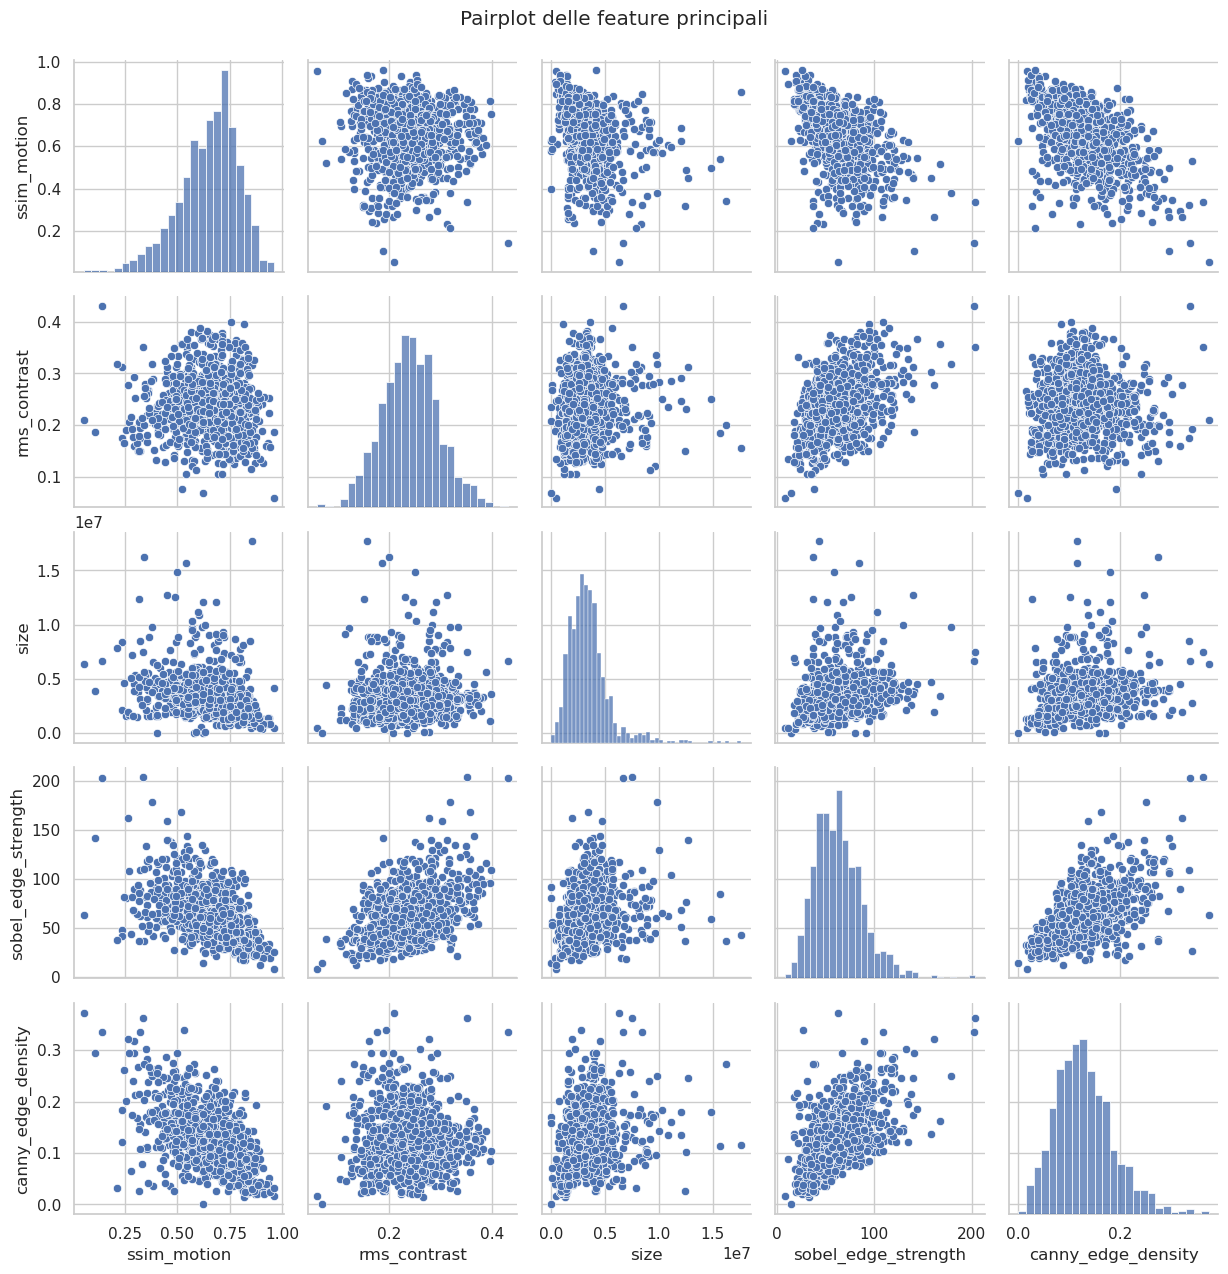

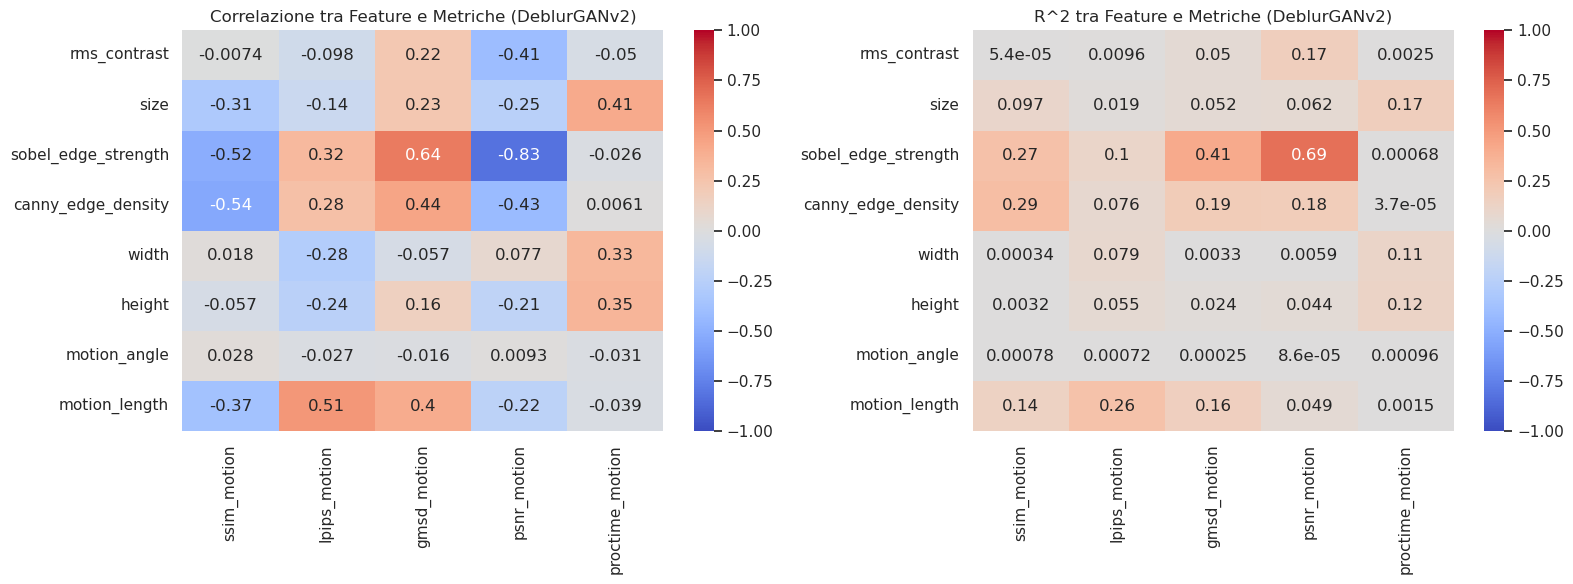

In [3]:

# Pairplot tra feature e ssim_motion
sns.pairplot(df[["ssim_motion", "rms_contrast", "size", "sobel_edge_strength", "canny_edge_density"]])
plt.suptitle("Pairplot delle feature principali", y=1.02)
plt.show()

# Heatmap correlazione
features = ['rms_contrast', 'size', 'sobel_edge_strength', 'canny_edge_density', "width", "height", "motion_angle", "motion_length"]
metrics = ['ssim_motion', 'lpips_motion', 'gmsd_motion', 'psnr_motion', 'proctime_motion']
# Calculate regular correlation
corr_df = df[features + metrics].corr()

# Calculate R^2 values
r_squared_df = corr_df ** 2

# Plot side-by-side correlation heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Regular correlation heatmap
sns.heatmap(corr_df.loc[features, metrics], annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Correlazione tra Feature e Metriche (DeblurGANv2)')

# R^2 heatmap
sns.heatmap(r_squared_df.loc[features, metrics], annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('R^2 tra Feature e Metriche (DeblurGANv2)')

plt.tight_layout()
plt.show()



## Metriche per Categoria


Studiamo come la qualità del deblurring varia tra le diverse categorie di immagini. Visualizziamo le metriche medie (SSIM, PSNR, ecc.) per ogni categoria.


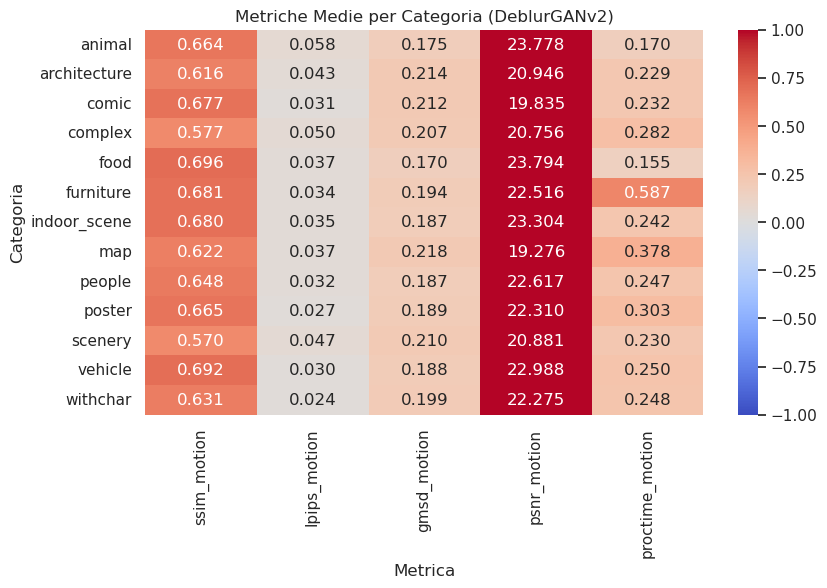

In [4]:

metrics = ['ssim_motion', 'lpips_motion', 'gmsd_motion', 'psnr_motion', 'proctime_motion']
category_means = df.groupby('category')[metrics].mean()

plt.figure(figsize=(9, 5))
sns.heatmap(category_means, annot=True, cmap="coolwarm", fmt=".3f", vmin=-1, vmax=1)
plt.title('Metriche Medie per Categoria (DeblurGANv2)')
plt.ylabel('Categoria')
plt.xlabel('Metrica')
plt.show()



## Simple linear regressions

In [5]:
from common.config import IDPA_DATASET, DEBLURGANV2_DATASET

# Carica i dati
df_blur = pd.read_parquet(IDPA_DATASET)
df_gan = pd.read_parquet(DEBLURGANV2_DATASET)

# Unione tramite chiave 'key'
df = pd.merge(df_blur, df_gan, on="key")

# SSIM medio
df["ssim"] = df[["ssim_box", "ssim_gaussian", "ssim_motion"]].mean(axis=1)

# Rimozione NaN
df = df.dropna(subset=["ssim", "gaussian_sigma", "box_size", "motion_length"])


In [6]:

def regressione_e_plot(x, y, x_label, y_label, titolo):
    x = x.astype(float)
    y = y.astype(float)

    cov_xy = np.cov(x, y, ddof=1)[0, 1]
    var_x = np.var(x, ddof=1)
    beta = cov_xy / var_x
    alpha = y.mean() - beta * x.mean()

    y_pred = beta * x + alpha
    ss_res = ((y - y_pred) ** 2).sum()
    ss_tot = ((y - y.mean()) ** 2).sum()
    r2 = 1 - ss_res / ss_tot

    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, s=10, label="Dati")
    plt.plot(x, y_pred, color="red", label=f"y = {beta:.3f}x + {alpha:.3f}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(titolo)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {"β (slope)": beta, "α (intercept)": alpha, "R²": r2}



### 📦 Regressione: SSIM_box ~ box_size  
- **β = quanto cambia SSIM se aumenta di 1 il kernel box**
- **R² = quanto il kernel spiega la variazione di SSIM**


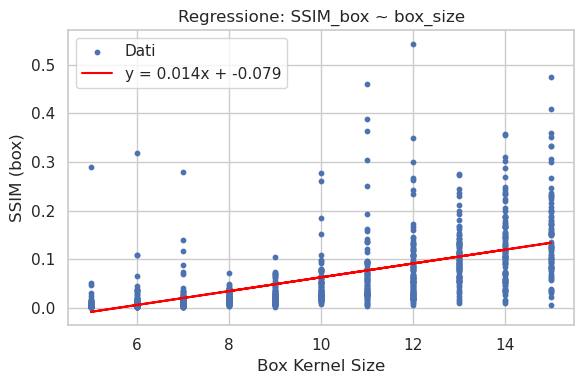

In [7]:

box_res = regressione_e_plot(
    df["box_size"], df["lpips_box"],
    "Box Kernel Size", "SSIM (box)",
    "Regressione: SSIM_box ~ box_size"
)



### 🌫️ Regressione: SSIM_gaussian ~ gaussian_sigma  
- **β = quanto cambia SSIM se aumenta σ**
- **R² = quanto σ spiega la variazione di SSIM**


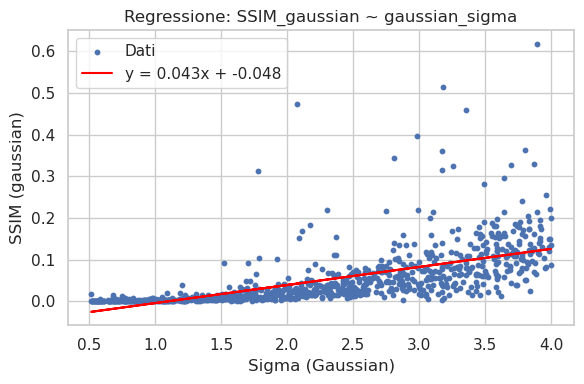

In [8]:

gauss_res = regressione_e_plot(
    df["gaussian_sigma"], df["lpips_gaussian"],
    "Sigma (Gaussian)", "SSIM (gaussian)",
    "Regressione: SSIM_gaussian ~ gaussian_sigma"
)



### ➖ Regressione: SSIM_motion ~ motion_length  
- **β = quanto cambia SSIM se aumenta la lunghezza del motion blur**
- **R² = quanto motion_length spiega la variazione di SSIM**


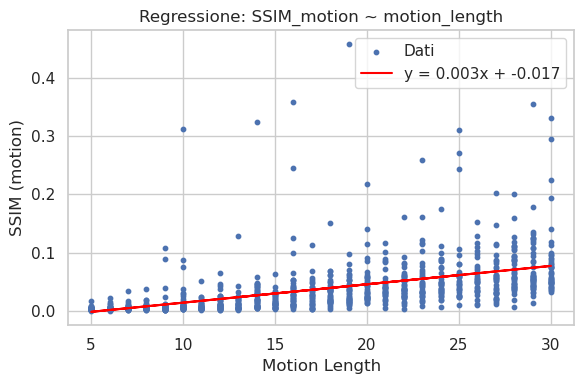

In [9]:

motion_res = regressione_e_plot(
    df["motion_length"], df["lpips_motion"],
    "Motion Length", "SSIM (motion)",
    "Regressione: SSIM_motion ~ motion_length"
)


### Tabella Riepilogo Risultati

In [10]:

results = pd.DataFrame([box_res, gauss_res, motion_res],
                       index=["Box", "Gaussian", "Motion"])
results


β (slope)  α (intercept)        R²
Box        0.014194      -0.078801  0.361546
Gaussian   0.043357      -0.047690  0.422150
Motion     0.003149      -0.017035  0.264894

## Regressione multipla con 4 feature


Costruiamo un primo modello di regressione lineare multipla usando 4 feature numeriche.
Valutiamo i parametri stimati, la significatività statistica e la bontà dell'adattamento.


In [11]:

features = ['rms_contrast', 'size', 'sobel_edge_strength', 'canny_edge_density', "width", "height", "motion_angle", "motion_length"]
X = df[features]
y = df[f"{METRIC}_motion"]
X = add_constant(X)
model = sm.OLS(y, X).fit()
display(model.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ssim_motion   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     167.6
Date:                Thu, 29 May 2025   Prob (F-statistic):          3.41e-175
Time:                        14:09:39   Log-Likelihood:                 947.41
No. Observations:                 950   AIC:                            -1877.
Df Residuals:                     941   BIC:                            -1833.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7273      0.025     29.463      0.000       0.679       0.776
rms_contrast            0.1888      0.066      2.863      0.004       0.059       0.318
size                 -4.75e-08   3.25e-09    -14.624      0.000   -5.39e-08   -4.11e-08
sobel_edge_strength    -0.0014      0.000     -7.670      0.000      -0.002      -0.001
canny_edge_density     -0.5749      0.067     -8.539      0.000      -0.707      -0.443
width                   0.0001   1.03e-05     10.852      0.000    9.17e-05       0.000
height                  0.0001   1.04e-05      9.717      0.000    8.09e-05       0.000
motion_angle         2.176e-05   2.81e-05      0.775      0.439   -3.34e-05    7.69e-05
motion_length          -0.0064      0.000    -16.628      0.000      -0.007      -0.006
==============================================================================
Omnibus:                      130.291   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.059
Skew:                          -0.870   Prob(JB):                     8.17e-50
Kurtosis:                       4.638   Cond. No.                     1.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regressione con variabili categoriche


Estendiamo il modello includendo anche la variabile categorica category, trasformandola in variabili dummy.
Valutiamo se la tipologia dell'immagine influisce significativamente sulla qualità del deblurring.


In [12]:

X_cat = pd.get_dummies(df['category'], drop_first=True).astype(float)
df_cat = pd.concat([X_cat, df[f"{METRIC}_motion"]], axis=1).dropna()
X = add_constant(df_cat.drop(f"{METRIC}_motion", axis=1))
y = df_cat[f"{METRIC}_motion"]
model_cat = sm.OLS(y, X).fit()
display(model_cat.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ssim_motion   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     6.874
Date:                Thu, 29 May 2025   Prob (F-statistic):           5.20e-12
Time:                        14:09:39   Log-Likelihood:                 566.68
No. Observations:                 950   AIC:                            -1107.
Df Residuals:                     937   BIC:                            -1044.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6638      0.014     47.964      0.000       0.637       0.691
architecture    -0.0483      0.021     -2.332      0.020      -0.089      -0.008
comic            0.0128      0.020      0.646      0.519      -0.026       0.052
complex         -0.0867      0.021     -4.187      0.000      -0.127      -0.046
food             0.0320      0.021      1.535      0.125      -0.009       0.073
furniture        0.0171      0.021      0.808      0.419      -0.024       0.058
indoor_scene     0.0163      0.021      0.767      0.443      -0.025       0.058
map             -0.0419      0.020     -2.052      0.040      -0.082      -0.002
people          -0.0159      0.021     -0.758      0.449      -0.057       0.025
poster           0.0014      0.020      0.068      0.946      -0.038       0.041
scenery         -0.0935      0.022     -4.318      0.000      -0.136      -0.051
vehicle          0.0280      0.021      1.311      0.190      -0.014       0.070
withchar        -0.0328      0.027     -1.209      0.227      -0.086       0.020
==============================================================================
Omnibus:                       68.324   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.798
Skew:                          -0.664   Prob(JB):                     1.05e-18
Kurtosis:                       3.572   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modello completo: numeriche + categorie


Creiamo un modello completo che unisce tutte le feature numeriche e tutte le categorie (dummy variables).
Questo ci permette di valutare con più precisione l'effetto combinato di tutte le variabili disponibili.


In [13]:
X_full = pd.concat([df[features], pd.get_dummies(df['category'], drop_first=True).astype(np.float64)], axis=1)
df_full = pd.concat([X_full, df[f"{METRIC}_motion"]], axis=1).dropna()
X = add_constant(df_full.drop(f"{METRIC}_motion", axis=1))
y = df_full[f"{METRIC}_motion"]
model_full = sm.OLS(y, X).fit()
display(model_full.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ssim_motion   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     71.50
Date:                Thu, 29 May 2025   Prob (F-statistic):          3.54e-172
Time:                        14:09:39   Log-Likelihood:                 969.24
No. Observations:                 950   AIC:                            -1896.
Df Residuals:                     929   BIC:                            -1795.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7402      0.026     28.765      0.000       0.690       0.791
rms_contrast            0.1050      0.072      1.455      0.146      -0.037       0.247
size                -4.747e-08   3.33e-09    -14.269      0.000    -5.4e-08   -4.09e-08
sobel_edge_strength    -0.0013      0.000     -6.630      0.000      -0.002      -0.001
canny_edge_density     -0.5475      0.072     -7.610      0.000      -0.689      -0.406
width                   0.0001   1.08e-05     11.575      0.000       0.000       0.000
height               9.762e-05   1.16e-05      8.407      0.000    7.48e-05       0.000
motion_angle         2.085e-05   2.79e-05      0.747      0.455   -3.39e-05    7.56e-05
motion_length          -0.0064      0.000    -16.816      0.000      -0.007      -0.006
architecture           -0.0285      0.014     -2.028      0.043      -0.056      -0.001
comic                   0.0236      0.016      1.521      0.129      -0.007       0.054
complex                -0.0365      0.014     -2.562      0.011      -0.064      -0.009
food                    0.0175      0.014      1.246      0.213      -0.010       0.045
furniture              -0.0286      0.015     -1.964      0.050      -0.057    -2.7e-05
indoor_scene           -0.0250      0.014     -1.727      0.084      -0.053       0.003
map                    -0.0203      0.015     -1.333      0.183      -0.050       0.010
people                 -0.0182      0.014     -1.266      0.206      -0.046       0.010
poster                 -0.0016      0.014     -0.113      0.910      -0.030       0.026
scenery                -0.0365      0.015     -2.479      0.013      -0.065      -0.008
vehicle                -0.0144      0.015     -0.984      0.325      -0.043       0.014
withchar               -0.0562      0.018     -3.081      0.002      -0.092      -0.020
==============================================================================
Omnibus:                      144.306   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.124
Skew:                          -0.907   Prob(JB):                     6.66e-61
Kurtosis:                       4.926   Cond. No.                     1.20e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Selezione automatica (backward selection)


Applichiamo la procedura di selezione backward per eliminare automaticamente i predittori meno significativi.
Restano solo le variabili che contribuiscono in modo significativo al modello.


In [14]:

def backward_selection(X, y, threshold=0.05):
    X = add_constant(X)
    prev_adj_r2 = -np.inf
    while True:
        model = sm.OLS(y, X).fit()
        adj_r2 = model.rsquared_adj
        if adj_r2 > prev_adj_r2:
            prev_adj_r2 = adj_r2
            pvals = model.pvalues.drop("const", errors='ignore')
            worst = pvals.idxmax()
            X = X.drop(columns=worst)
        else:
            break
    return sm.OLS(y, X).fit()

model_back = backward_selection(X_full, df[f"{METRIC}_motion"])
display(model_back.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ssim_motion   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     84.13
Date:                Thu, 29 May 2025   Prob (F-statistic):          1.10e-174
Time:                        14:09:39   Log-Likelihood:                 968.38
No. Observations:                 950   AIC:                            -1901.
Df Residuals:                     932   BIC:                            -1813.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7443      0.025     29.779      0.000       0.695       0.793
rms_contrast            0.1012      0.071      1.423      0.155      -0.038       0.241
size                -4.708e-08   3.31e-09    -14.236      0.000   -5.36e-08   -4.06e-08
sobel_edge_strength    -0.0013      0.000     -6.711      0.000      -0.002      -0.001
canny_edge_density     -0.5448      0.072     -7.603      0.000      -0.685      -0.404
width                   0.0001   1.05e-05     11.668      0.000       0.000       0.000
height               9.733e-05   1.13e-05      8.593      0.000    7.51e-05       0.000
motion_length          -0.0064      0.000    -16.907      0.000      -0.007      -0.006
architecture           -0.0238      0.012     -2.016      0.044      -0.047      -0.001
comic                   0.0281      0.013      2.223      0.026       0.003       0.053
complex                -0.0323      0.012     -2.695      0.007      -0.056      -0.009
food                    0.0209      0.012      1.741      0.082      -0.003       0.044
furniture              -0.0237      0.012     -1.960      0.050      -0.047    3.34e-05
indoor_scene           -0.0205      0.012     -1.690      0.091      -0.044       0.003
map                    -0.0156      0.013     -1.199      0.231      -0.041       0.010
people                 -0.0142      0.012     -1.189      0.235      -0.038       0.009
scenery                -0.0321      0.013     -2.528      0.012      -0.057      -0.007
withchar               -0.0521      0.016     -3.170      0.002      -0.084      -0.020
==============================================================================
Omnibus:                      139.473   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.228
Skew:                          -0.889   Prob(JB):                     1.14e-57
Kurtosis:                       4.861   Cond. No.                     1.19e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analisi dei residui


Controlliamo che le ipotesi del modello di regressione siano soddisfatte, in particolare: linearità, omoscedasticità e distribuzione normale dei residui.
Utilizziamo istogramma dei residui e grafico residui vs predetti.


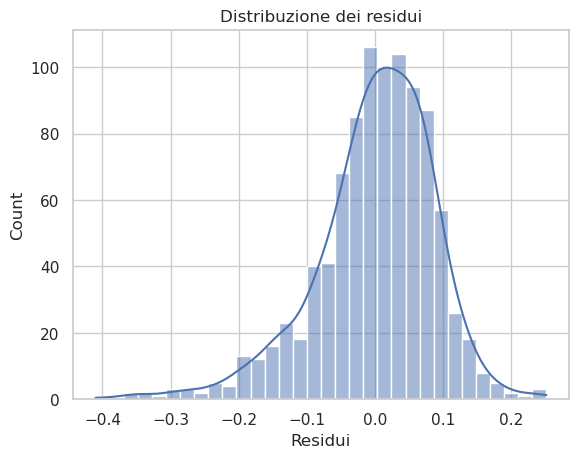

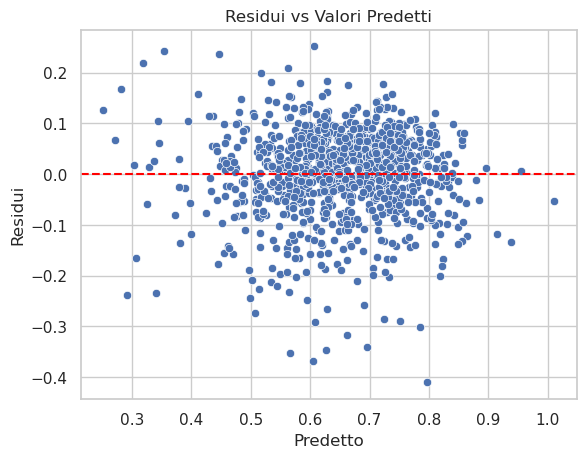

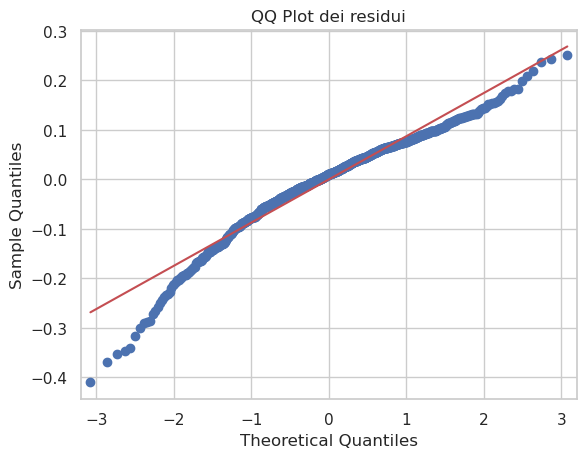

In [15]:

residuals = model_back.resid
fitted = model_back.fittedvalues

sns.histplot(residuals, kde=True)
plt.title("Distribuzione dei residui")
plt.xlabel("Residui")
plt.show()

sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residui vs Valori Predetti")
plt.xlabel("Predetto")
plt.ylabel("Residui")
plt.show()

sm.qqplot(residuals, line='s')
plt.title("QQ Plot dei residui")
plt.show()

## Predizione con intervallo


Eseguiamo una predizione reale con intervallo di confidenza.
Questo mostra come il modello può essere usato per prevedere la qualità di una nuova immagine conoscendo solo le sue feature.


In [16]:
from common.config import DEMO_IMAGE_KEY

# Carica l'immagine di esempio dal dataset
demo_image = df.loc[df['key'] == DEMO_IMAGE_KEY]

# Estrai le feature necessarie per la predizione
x_demo = {}

# Aggiungi le categorie come dummy variables
for category in model_back.model.exog_names:
    if category in features:
        x_demo[category] = demo_image[category].iloc[0]
    else:
        x_demo[category] = 1 if demo_image['category'].iloc[0] == category else 0

# Prepara il dataframe di input per il modello
input_df_demo = pd.DataFrame([{**x_demo}])
input_df_demo["const"] = 1.0

# Effettua la predizione
pred_demo = model_back.get_prediction(input_df_demo)
pred_demo.summary_frame(alpha=0.05)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  0.73092  0.013133       0.705146       0.756694      0.556016      0.905823

In [17]:
df.loc[df["key"] == DEMO_IMAGE_KEY, f"{METRIC}_motion"]

496    0.788065
Name: ssim_motion, dtype: float64

## Conclusioni Finali


Riassumiamo i risultati più importanti emersi dall’analisi, specificando le variabili chiave e l’efficacia del modello predittivo.


- ssim_motion è fortemente legato a: contrasto, edge strength, e densità dei bordi.
- Alcune categorie di immagine (es. "scenery", "complex") tendono ad avere SSIM più basso.
- Il modello completo spiega 41% della varianza. Dopo selezione backward, restano solo le feature davvero utili.
- Il modello permette anche di fare previsioni utili conoscendo solo le caratteristiche visive.
